In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conf_key = {'CHI':1163450153, 'CSCW':1195049314, 'UBI':1171345118, 'UIST':1166315290}

ori_paperyear_conf = {}
ori_citingpatent_conf = {}

In [2]:
# join paperid with paperyear and papercitation2science
# df_year = pd.read_csv('../dataAug10/paperyear_result.tsv', usecols=[1,2])
df_year = pd.read_csv('../dataAug10/mergeversiondata/paperyear_result.tsv')
for conf in ["CHI", "CSCW", "UBI", "UIST"]:
    new_df = pd.read_csv('../dataAug10/mergeversiondata/paperyear_result_{}.tsv'.format(conf))
    df_year = df_year.append(new_df, ignore_index=True)
df_year = df_year.drop_duplicates()

df_paperid = pd.read_csv('../dataAug10/mergeversiondata/HCI_paperids.tsv', sep='\t')
df_paperid = df_paperid.drop_duplicates()
df_paperid.head(4)


/tmp/ipykernel_3662693/2767055383.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_year = df_year.append(new_df, ignore_index=True)
/tmp/ipykernel_3662693/2767055383.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_year = df_year.append(new_df, ignore_index=True)
/tmp/ipykernel_3662693/2767055383.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_year = df_year.append(new_df, ignore_index=True)
/tmp/ipykernel_3662693/2767055383.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_year = df_year.append(new_df, ignore_index=True)


paper_id     conf_id
0  1001944803  1163450153
1   100915271  1163450153
2   101198059  1163450153
3   101454950  1163450153

In [3]:
df_paper_year = df_year.merge(df_paperid, left_on='paperid', right_on='paper_id')
df_paper_year = df_paper_year.drop_duplicates()[['paper_id', 'year', 'conf_id']]
df_paper_year.head(4)

paper_id  year     conf_id
0  2244265604  2014  1163450153
1  2244265604  2014  1163450153
2  2244428935  2016  1163450153
3  2244483578  2010  1163450153

In [4]:
df_paper_year.loc[df_paper_year["year"]==2019]
# df_paper_year.loc[df_paper_year["conf_id"] == 1163450153]["paper_id"].to_list()[0]

paper_id  year     conf_id
34626  2900821431  2019  1195049314
34628  2785984185  2019  1195049314
34632  2901382307  2019  1195049314
34634  2901537701  2019  1195049314
36145  2898575457  2019  1195049314
...           ...   ...         ...
59979  3009526132  2019  1171345118
59980  3009948021  2019  1171345118
59981  3010091898  2019  1171345118
59982  3010197215  2019  1171345118
60330  3199416054  2019  1171345118

[1978 rows x 3 columns]

In [5]:
# df_papercitation2science = pd.read_csv('../data/papercitationscience_result.tsv', usecols=[3,4])
df_papercitation2science = pd.read_csv('../dataAug10/mergeversiondata/papercitationscience.tsv')
for conf in ["CHI", "CSCW", "UbiComp", "UIST"]:
    new_df = pd.read_csv('../dataAug10/mergeversiondata/papercitationscience_{}.tsv'.format(conf))[["reftype","confscore","magid","patent"]]
    df_papercitation2science = df_papercitation2science.append(new_df, ignore_index=True)
def get_patentid(x):
    if '-' not in x: return x
    x = x[x.index('-')+1:]
    if '-' in x: return x[:x.index('-')]
    else: return x
df_papercitation2science["patent"] = df_papercitation2science["patent"].astype(str)
df_papercitation2science["patent"] = df_papercitation2science["patent"].apply(get_patentid)
df_papercitation2science = df_papercitation2science.drop_duplicates()
df_papercitation2science.head(3)

/tmp/ipykernel_3662693/2793207656.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_papercitation2science = df_papercitation2science.append(new_df, ignore_index=True)
/tmp/ipykernel_3662693/2793207656.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_papercitation2science = df_papercitation2science.append(new_df, ignore_index=True)
/tmp/ipykernel_3662693/2793207656.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_papercitation2science = df_papercitation2science.append(new_df, ignore_index=True)
/tmp/ipykernel_3662693/2793207656.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_papercitation2science = df_papercitatio

Unnamed: 0 reftype  confscore       magid    patent
0         0.0     app          9  2134161165  10001804
1         1.0     app          9  1967451823  10001885
2         2.0     app          9  1967451823  10001888

In [6]:
# df_paper_pc2s = df_papercitation2science.merge(df_paperid, left_on='magid', right_on='paperid')

In [7]:
df_paper_pc2s_year = df_papercitation2science.merge(df_paper_year, left_on='magid', right_on='paper_id')
df_paper_pc2s_year = df_paper_pc2s_year.drop_duplicates().drop(columns=['paper_id']) #.drop(columns=['confid_y', 'paperid']).rename(columns={"confid_x":"confid"})
df_paper_pc2s_year.head(5)

Unnamed: 0 reftype  confscore       magid    patent  year     conf_id
0         0.0     app          9  2134161165  10001804  1994  1163450153
2      2077.0     unk         10  2134161165   6024576  1994  1163450153
4      2080.0     unk          8  2134161165   6028593  1994  1163450153
6      2095.0     unk          8  2134161165   6057828  1994  1163450153
8      2112.0     unk         10  2134161165   6078308  1994  1163450153

In [8]:
for conf_name,conf_id in conf_key.items():
    ori_paperyear_conf[conf_name] = df_paper_year.loc[df_paper_year['conf_id']==conf_id]
    ori_citingpatent_conf[conf_name] = df_paper_pc2s_year.loc[df_paper_pc2s_year['conf_id']==conf_id]

ori_citingpatent_conf['CHI'].head(5)
# ori_paperyear_conf['CHI'].head(5)

Unnamed: 0 reftype  confscore       magid    patent  year     conf_id
0         0.0     app          9  2134161165  10001804  1994  1163450153
2      2077.0     unk         10  2134161165   6024576  1994  1163450153
4      2080.0     unk          8  2134161165   6028593  1994  1163450153
6      2095.0     unk          8  2134161165   6057828  1994  1163450153
8      2112.0     unk         10  2134161165   6078308  1994  1163450153

In [9]:
# HCI_filter_df_paperid = pd.read_csv('/local/home/yujielu/project/TransferInCS/newHCIdata/filtered_HCI_papers.csv', sep=',')
# HCI_filter_df_paperid.head(5)
# # from icecream import ic
# # ic(2336913620 in HCI_filter_df_paperid['mag_id'].tolist())
# white_list = HCI_filter_df_paperid['mag_id'].tolist()
# # TODO: white_list to be update?

In [10]:
from icecream import ic
paperyear_map_conf = {}
inv_paperyear_map_conf = {}
for conf, df in ori_paperyear_conf.items():
    paperyear_map = {}
    inv_paperyear_map = {}
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1] # paperid
        # if int(paperid) in white_list:
        #     continue
        paperyear = str(row[1]).split(',')[0].split('\n')[1].split()[1] # paperyear 
        # ic(paperid, paperyear)
        if paperyear not in paperyear_map.keys():
            paperyear_map[paperyear] = []    
        if paperid not in paperyear_map[paperyear]:
            paperyear_map[paperyear].append(paperid)
        inv_paperyear_map[paperid] = paperyear
    paperyear_map_conf[conf] = paperyear_map
    inv_paperyear_map_conf[conf] = inv_paperyear_map
print(">>> done paper year map construction")

>>> done paper year map construction


In [11]:
len(paperyear_map_conf["UIST"]['1990'])

22

In [12]:
# from icecream import ic
# # len(paperyear_map_conf["CHI"]['1987'])
# ori_paperyear = pd.read_csv('../dataAug10/paperyear.tsv', sep='\t')

In [13]:
# ori_paperyear.head(3)
# len(ori_paperyear.loc[(ori_paperyear['paperyear']==1986) & (ori_paperyear['paperid'].isin(df_paper_year.loc[df_paper_year["conf_id"] == 1163450153]["paper_id"].to_list()))])

In [14]:
citingpatent_map_conf = {}
citedpaper_map_conf = {}
for conf, df in ori_citingpatent_conf.items():
    citingpatent_map = {}
    citedpaper_map = {}
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[3].split()[1] # paperid
        patentid = str(row[1]).split(',')[0].split('\n')[4].split()[1] # patentid
        # paperyear
        if paperid not in inv_paperyear_map.keys(): continue
        paperyear = inv_paperyear_map[paperid]
        if paperyear not in citingpatent_map.keys():
            citingpatent_map[paperyear] = []
        if paperyear not in citedpaper_map.keys():
            citedpaper_map[paperyear] = []  
        citingpatent_map[paperyear].append(patentid)
        # unique cited paper this year
        if paperid not in citedpaper_map[paperyear]:
            citedpaper_map[paperyear].append(paperid)
    citingpatent_map_conf[conf] = citingpatent_map
    citedpaper_map_conf[conf] = citedpaper_map
print(">>> done citing data")

>>> done citing data


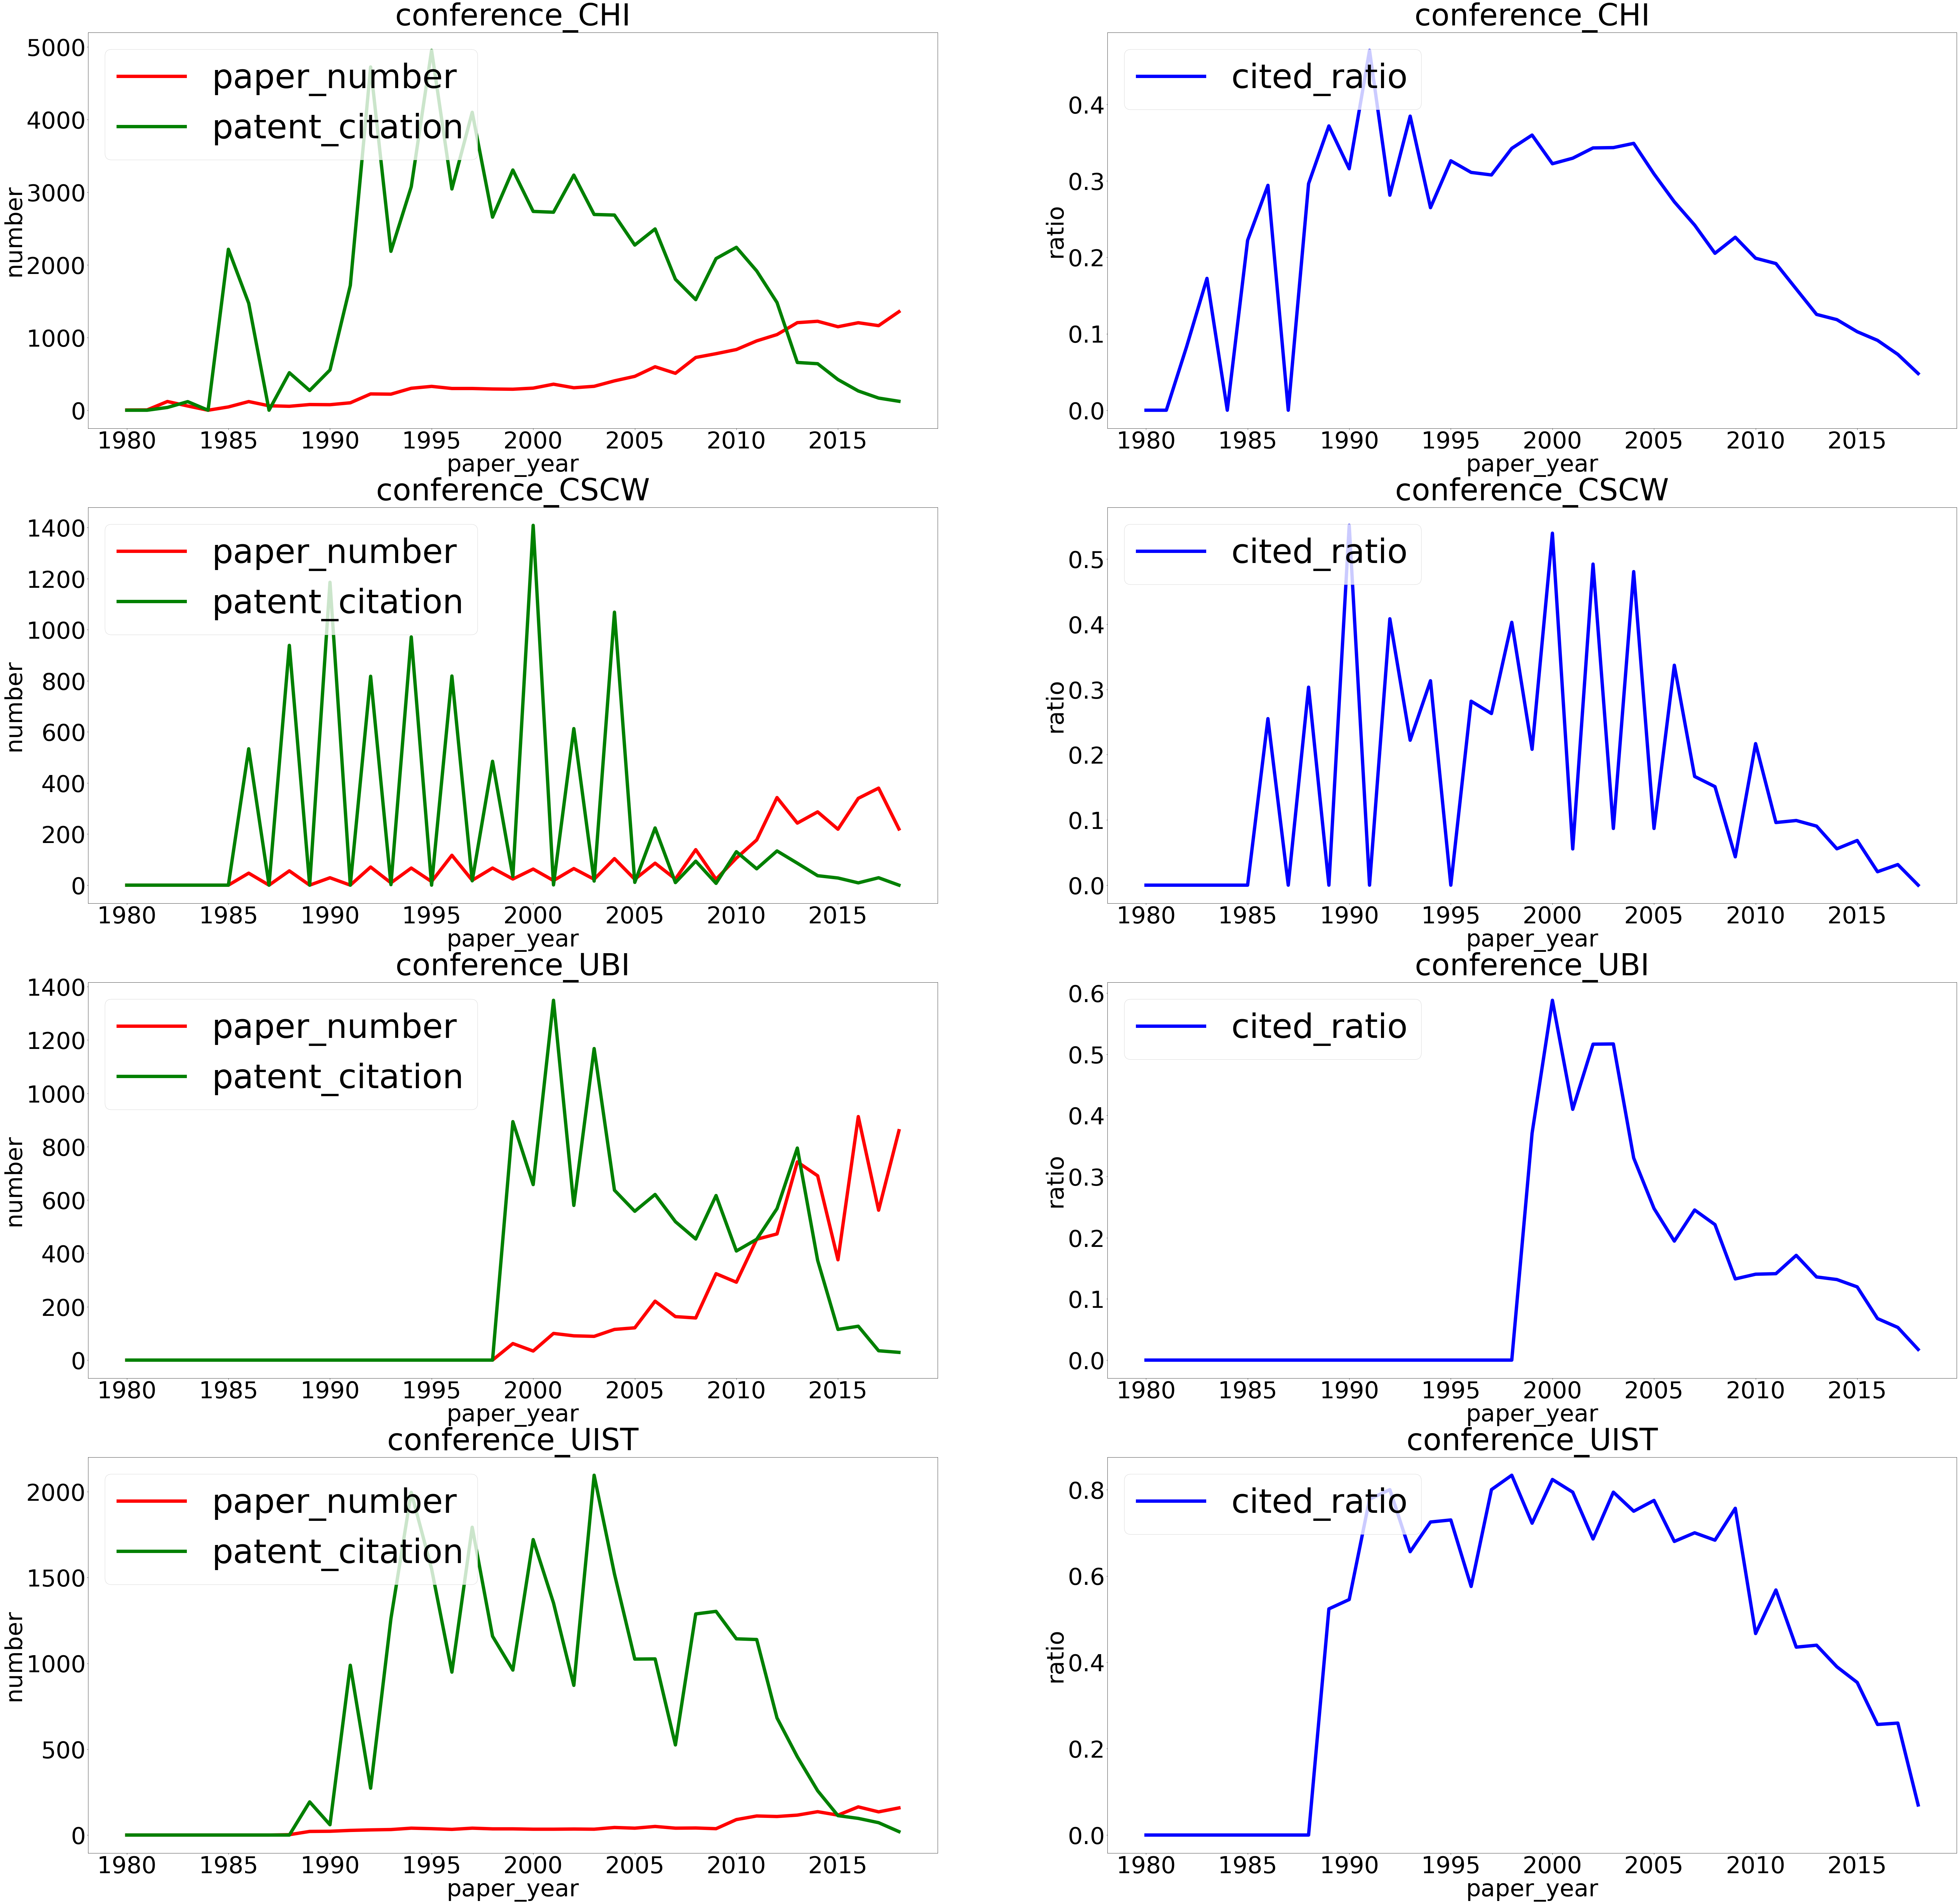

In [15]:
# Visualization
start = 1980
end = 2019
span = end - start
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4, ncols=2)
for ax in axes:
    ax[0].set_ylabel("number", fontsize=70)
    ax[1].set_ylabel("ratio", fontsize=70)
    for ax_c in ax:
        ax_c.set_xlabel("paper_year", fontsize=70)
        ax_c.tick_params(labelsize=70)

plot_idx = 0

X_year = [i for i in range (start, end)]

for conf, paperyear_map in paperyear_map_conf.items():
    Y_papercnt = [0] * span
    Y_citingpatentcnt = [0] * span
    Y_citedportion = [0.0] * span

    citingpatent_map = citingpatent_map_conf[conf]
    citedpaper_map = citedpaper_map_conf[conf]
    for i in range (start, end):
        if str(i) in paperyear_map.keys():
            Y_papercnt[i-start] = len(paperyear_map[str(i)])
        if str(i) in citingpatent_map.keys():
            Y_citingpatentcnt[i-start] = len(citingpatent_map[str(i)])    
        if str(i) in citedpaper_map.keys():
            Y_citedportion[i-start] = len(citedpaper_map[str(i)]) / Y_papercnt[i-start]
    axes[plot_idx, 0].plot(X_year,Y_papercnt, 'o-', label='paper_number', color='r', linewidth = 10)
    axes[plot_idx, 0].plot(X_year,Y_citingpatentcnt, 'o-', label='patent_citation', color='g', linewidth = 10)
    axes[plot_idx, 0].set_title('conference_{}'.format(conf), fontsize=90)
    axes[plot_idx, 0].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx, 1].plot(X_year,Y_citedportion, 'o-', label='cited_ratio', color='b', linewidth = 10 )
    axes[plot_idx, 1].set_title('conference_{}'.format(conf), fontsize=90)
    axes[plot_idx, 1].legend(loc = 'upper left', prop={'size': 100})
    plot_idx += 1
# plt.legend(loc = 'upper left')

In [15]:
#------------ analyze paper author -------------#
ori_author_conf = {}
# author
df_author = pd.read_csv('../dataAug10/mergeversiondata/paperauthororder.tsv', usecols=[1,2])
for conf in ["CHI", "CSCW", "UbiComp", "UIST"]:
    new_df = pd.read_csv('../dataAug10/mergeversiondata/paperauthororder_{}.tsv'.format(conf), usecols=[2,3])
    df_author = df_author.append(new_df, ignore_index=True)
df_author = df_author.drop_duplicates()

df_paper_author = df_author.merge(df_paperid, left_on='paperid', right_on='paper_id')
for conf_name,conf_id in conf_key.items():
    ori_author_conf[conf_name] = df_paper_author.loc[df_paper_author['conf_id']==conf_id]
ori_author_conf['CHI'].head(5)

/tmp/ipykernel_3588248/29652013.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_author = df_author.append(new_df, ignore_index=True)
/tmp/ipykernel_3588248/29652013.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_author = df_author.append(new_df, ignore_index=True)
/tmp/ipykernel_3588248/29652013.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_author = df_author.append(new_df, ignore_index=True)
/tmp/ipykernel_3588248/29652013.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_author = df_author.append(new_df, ignore_index=True)


paperid    authorid    paper_id     conf_id
0  1001944803  1925449899  1001944803  1163450153
1  1001944803  2073417960  1001944803  1163450153
2  1001944803  2113201779  1001944803  1163450153
3  1001944803  2141153954  1001944803  1163450153
4  1001944803  2153250100  1001944803  1163450153

In [16]:
citedpaper_list_conf = {}
for conf, df in ori_citingpatent_conf.items():
    citedpaper_list = []
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[3].split()[1] # paperid
        # patentid = str(row[1]).split(',')[0].split('\n')[1].split()[1] # patentid
        citedpaper_list.append(paperid)
    citedpaper_list_conf[conf] = citedpaper_list

cited_author_map_conf = {}
notcited_author_map_conf = {}
for conf, df in ori_author_conf.items():
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    cited_author_map = {}
    notcited_author_map = {}
    cited_paper_list = citedpaper_list_conf[conf]
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        authorid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        if paperid not in inv_paperyear_map.keys(): continue
        paperyear = inv_paperyear_map[paperid]
        if paperid in cited_paper_list:
            if paperyear not in cited_author_map.keys():
                cited_author_map[paperyear] = []
            if authorid not in cited_author_map[paperyear]:
                cited_author_map[paperyear].append(authorid)
        else:
            if paperyear not in notcited_author_map.keys():
                notcited_author_map[paperyear] = []
            if authorid not in notcited_author_map[paperyear]:
                notcited_author_map[paperyear].append(authorid)
    cited_author_map_conf[conf] = cited_author_map
    notcited_author_map_conf[conf] = notcited_author_map
print(">>> author map construction done")

>>> author map construction done


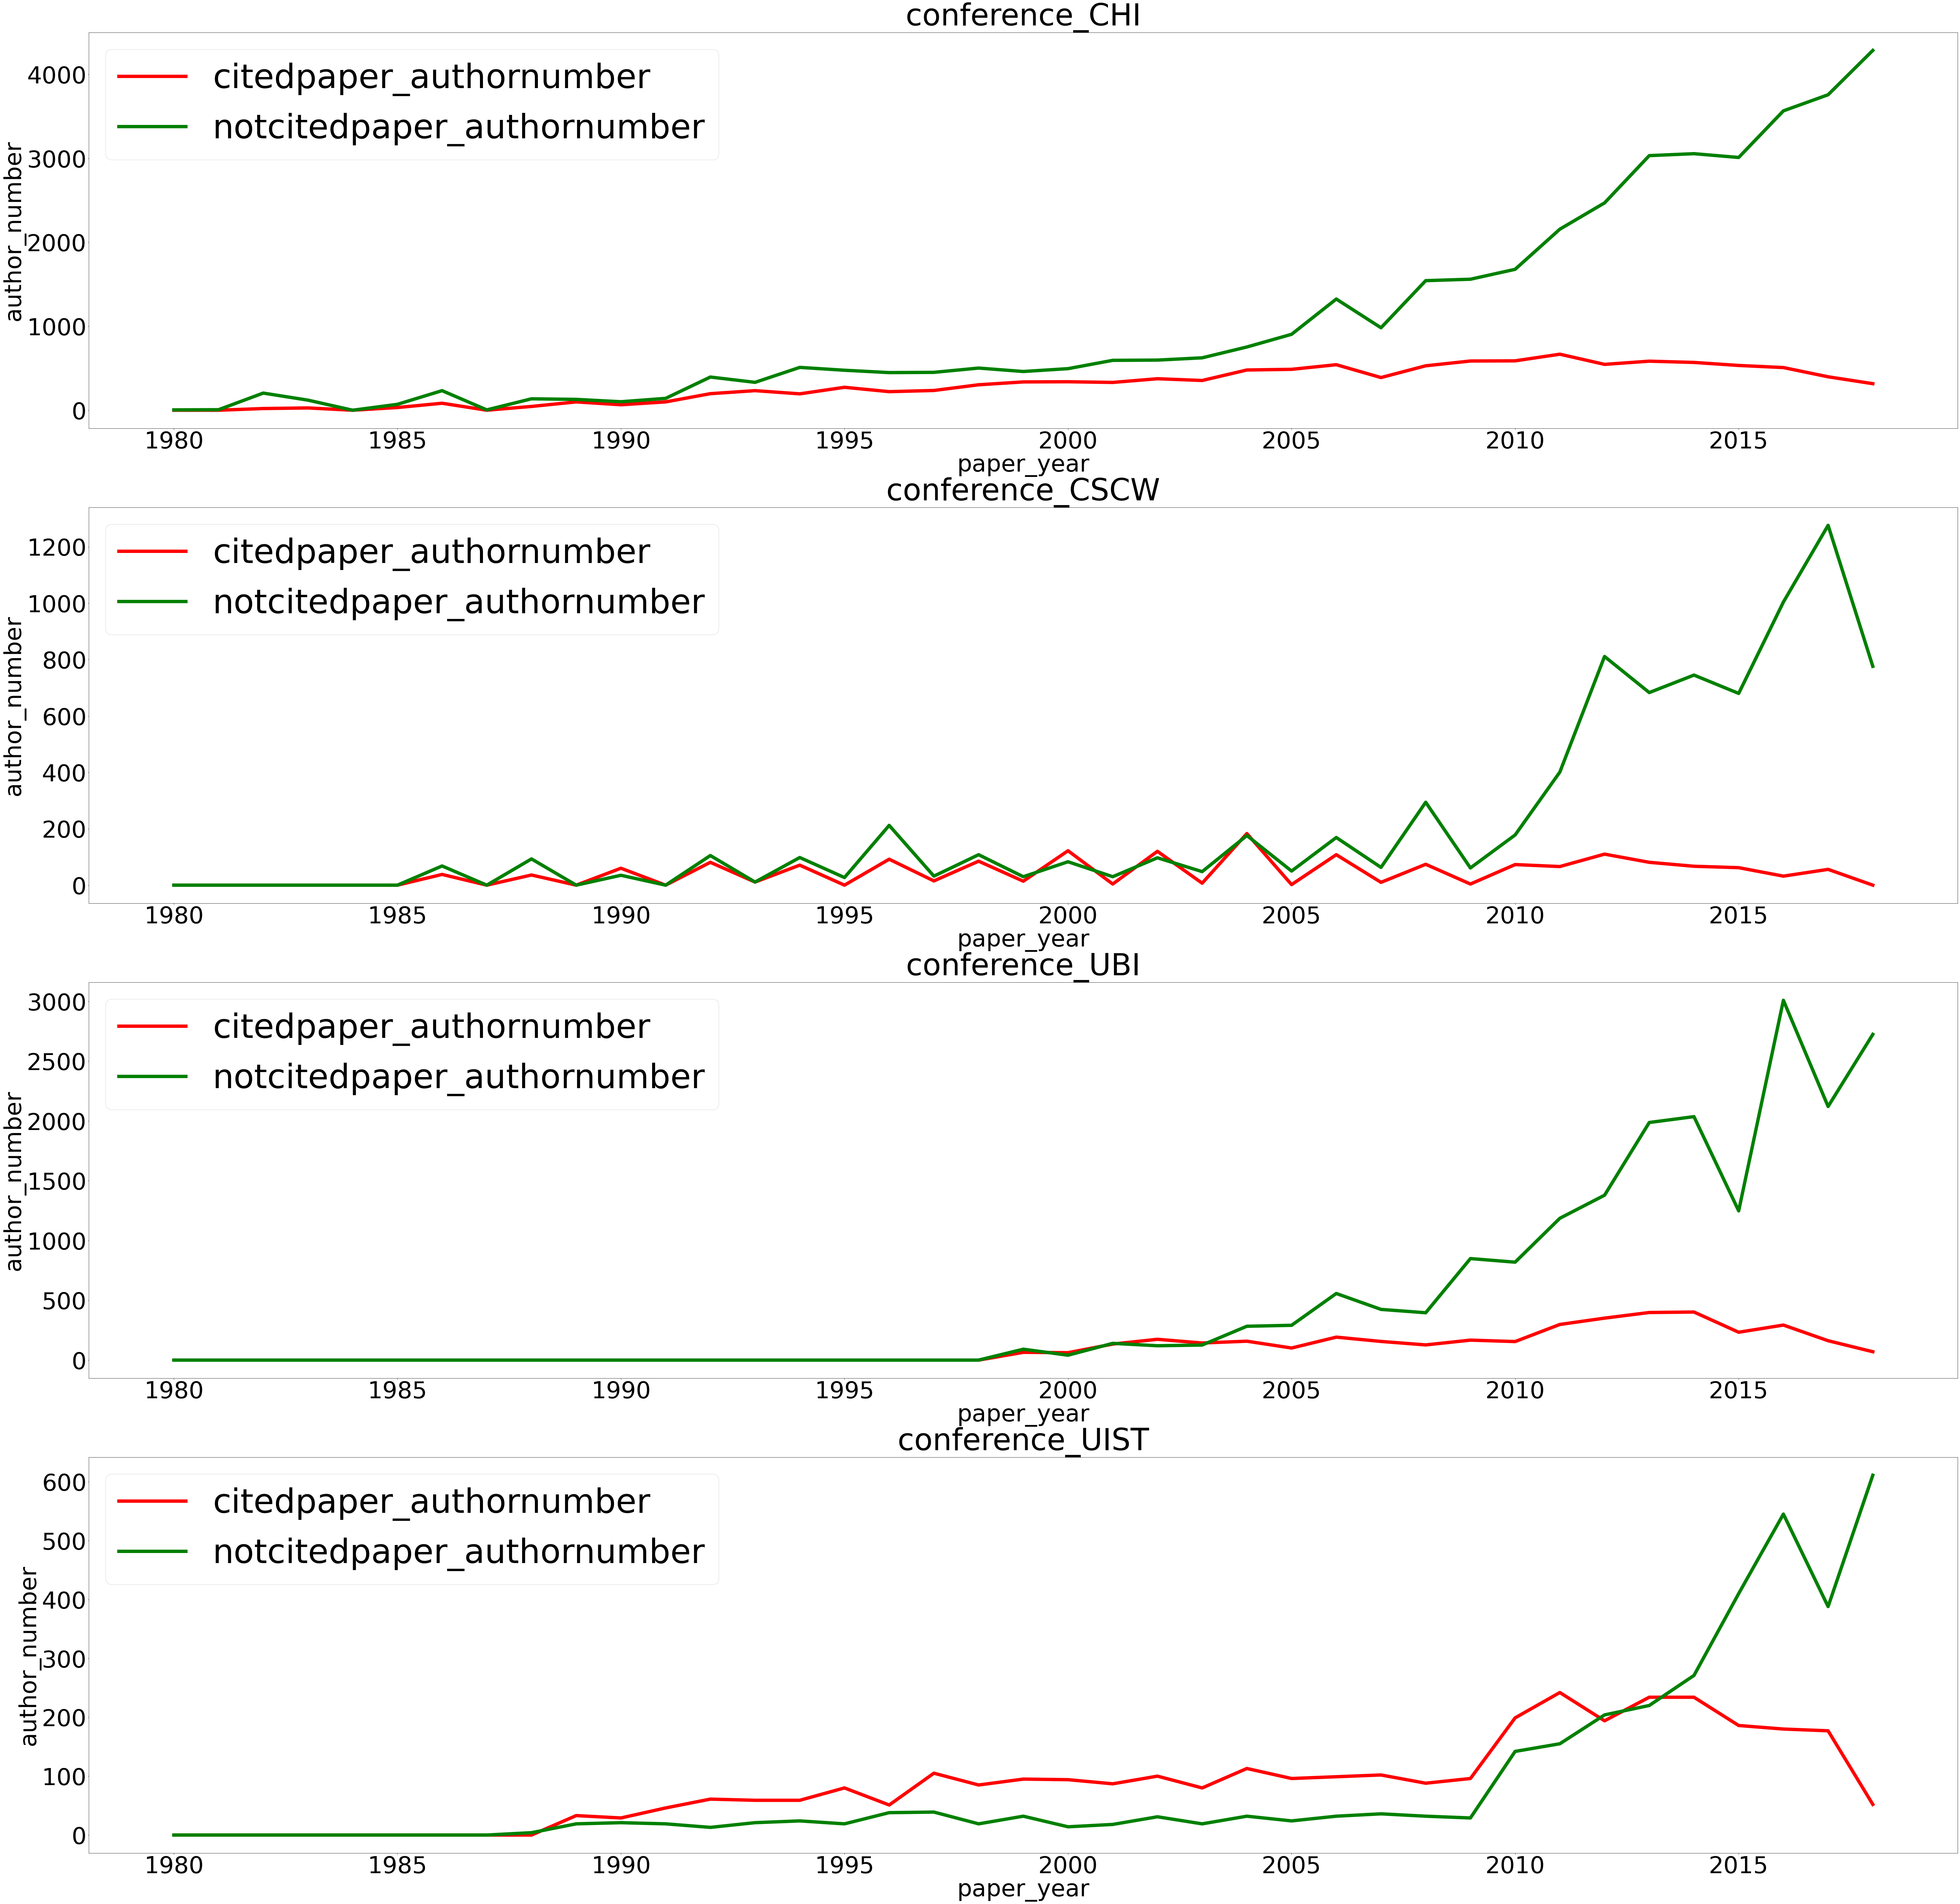

In [18]:
# Visualization
start = 1980
end = 2019
span = end - start
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_year", fontsize=70)
    ax_c.set_ylabel("author_number", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

X_year = [i for i in range (start, end)]

for conf, paperyear_map in paperyear_map_conf.items():
    Y_citedpaper_authorcnt = [0] * span
    Y_notcitedpaper_authorcnt = [0] * span

    cited_author_map = cited_author_map_conf[conf]
    notcited_author_map = notcited_author_map_conf[conf]
    for i in range (start, end):
        if str(i) in cited_author_map.keys():
            Y_citedpaper_authorcnt[i-start] = len(cited_author_map[str(i)])    
        if str(i) in notcited_author_map.keys():
            Y_notcitedpaper_authorcnt[i-start] = len(notcited_author_map[str(i)])    

    axes[plot_idx].plot(X_year,Y_citedpaper_authorcnt, 'o-', label='citedpaper_authornumber', color='r', linewidth = 10)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx].plot(X_year,Y_notcitedpaper_authorcnt, 'o-', label='notcitedpaper_authornumber', color='g', linewidth = 10)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    plot_idx += 1

In [17]:
#------------ analyze paper point -------------#
ori_citingpaper_conf = {}

df_cited = pd.read_csv('../dataAug10/mergeversiondata/papercited.tsv', usecols=[1,2])
for conf in ["CHI", "CSCW", "UbiComp", "UIST"]:
    new_df = pd.read_csv('../dataAug10/mergeversiondata/papercited_{}.tsv'.format(conf), usecols=[3,4])
    df_cited = df_cited.append(new_df, ignore_index=True)

df_paper_cited = df_cited.merge(df_paperid, left_on='citedpaperid', right_on='paper_id')
df_paper_cited = df_paper_cited.drop_duplicates()
# df_paper_cited.head(3)
# citing paper
for conf_name,conf_id in conf_key.items():
    ori_citingpaper_conf[conf_name] = df_paper_cited.loc[df_paper_cited['conf_id']==conf_id]
# ori_citingpaper_conf['CHI'].head(5)

/tmp/ipykernel_3588248/978944518.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
/tmp/ipykernel_3588248/978944518.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
/tmp/ipykernel_3588248/978944518.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)
/tmp/ipykernel_3588248/978944518.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cited = df_cited.append(new_df, ignore_index=True)


In [18]:
citingpaper_map_conf = {}
for conf, df in ori_citingpaper_conf.items():
    citingpaper_map = {}
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    count = 0
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        # paperyear
        if cited_paperid not in inv_paperyear_map.keys():
            count += 1
            continue
        paperyear = inv_paperyear_map[cited_paperid]
        if paperyear not in citingpaper_map.keys():
            citingpaper_map[paperyear] = []
        citingpaper_map[paperyear].append(citing_paperid)
    citingpaper_map_conf[conf] = citingpaper_map
print(">>> citing paper map construction done; count {}".format(count))

>>> citing paper map construction done; count 1


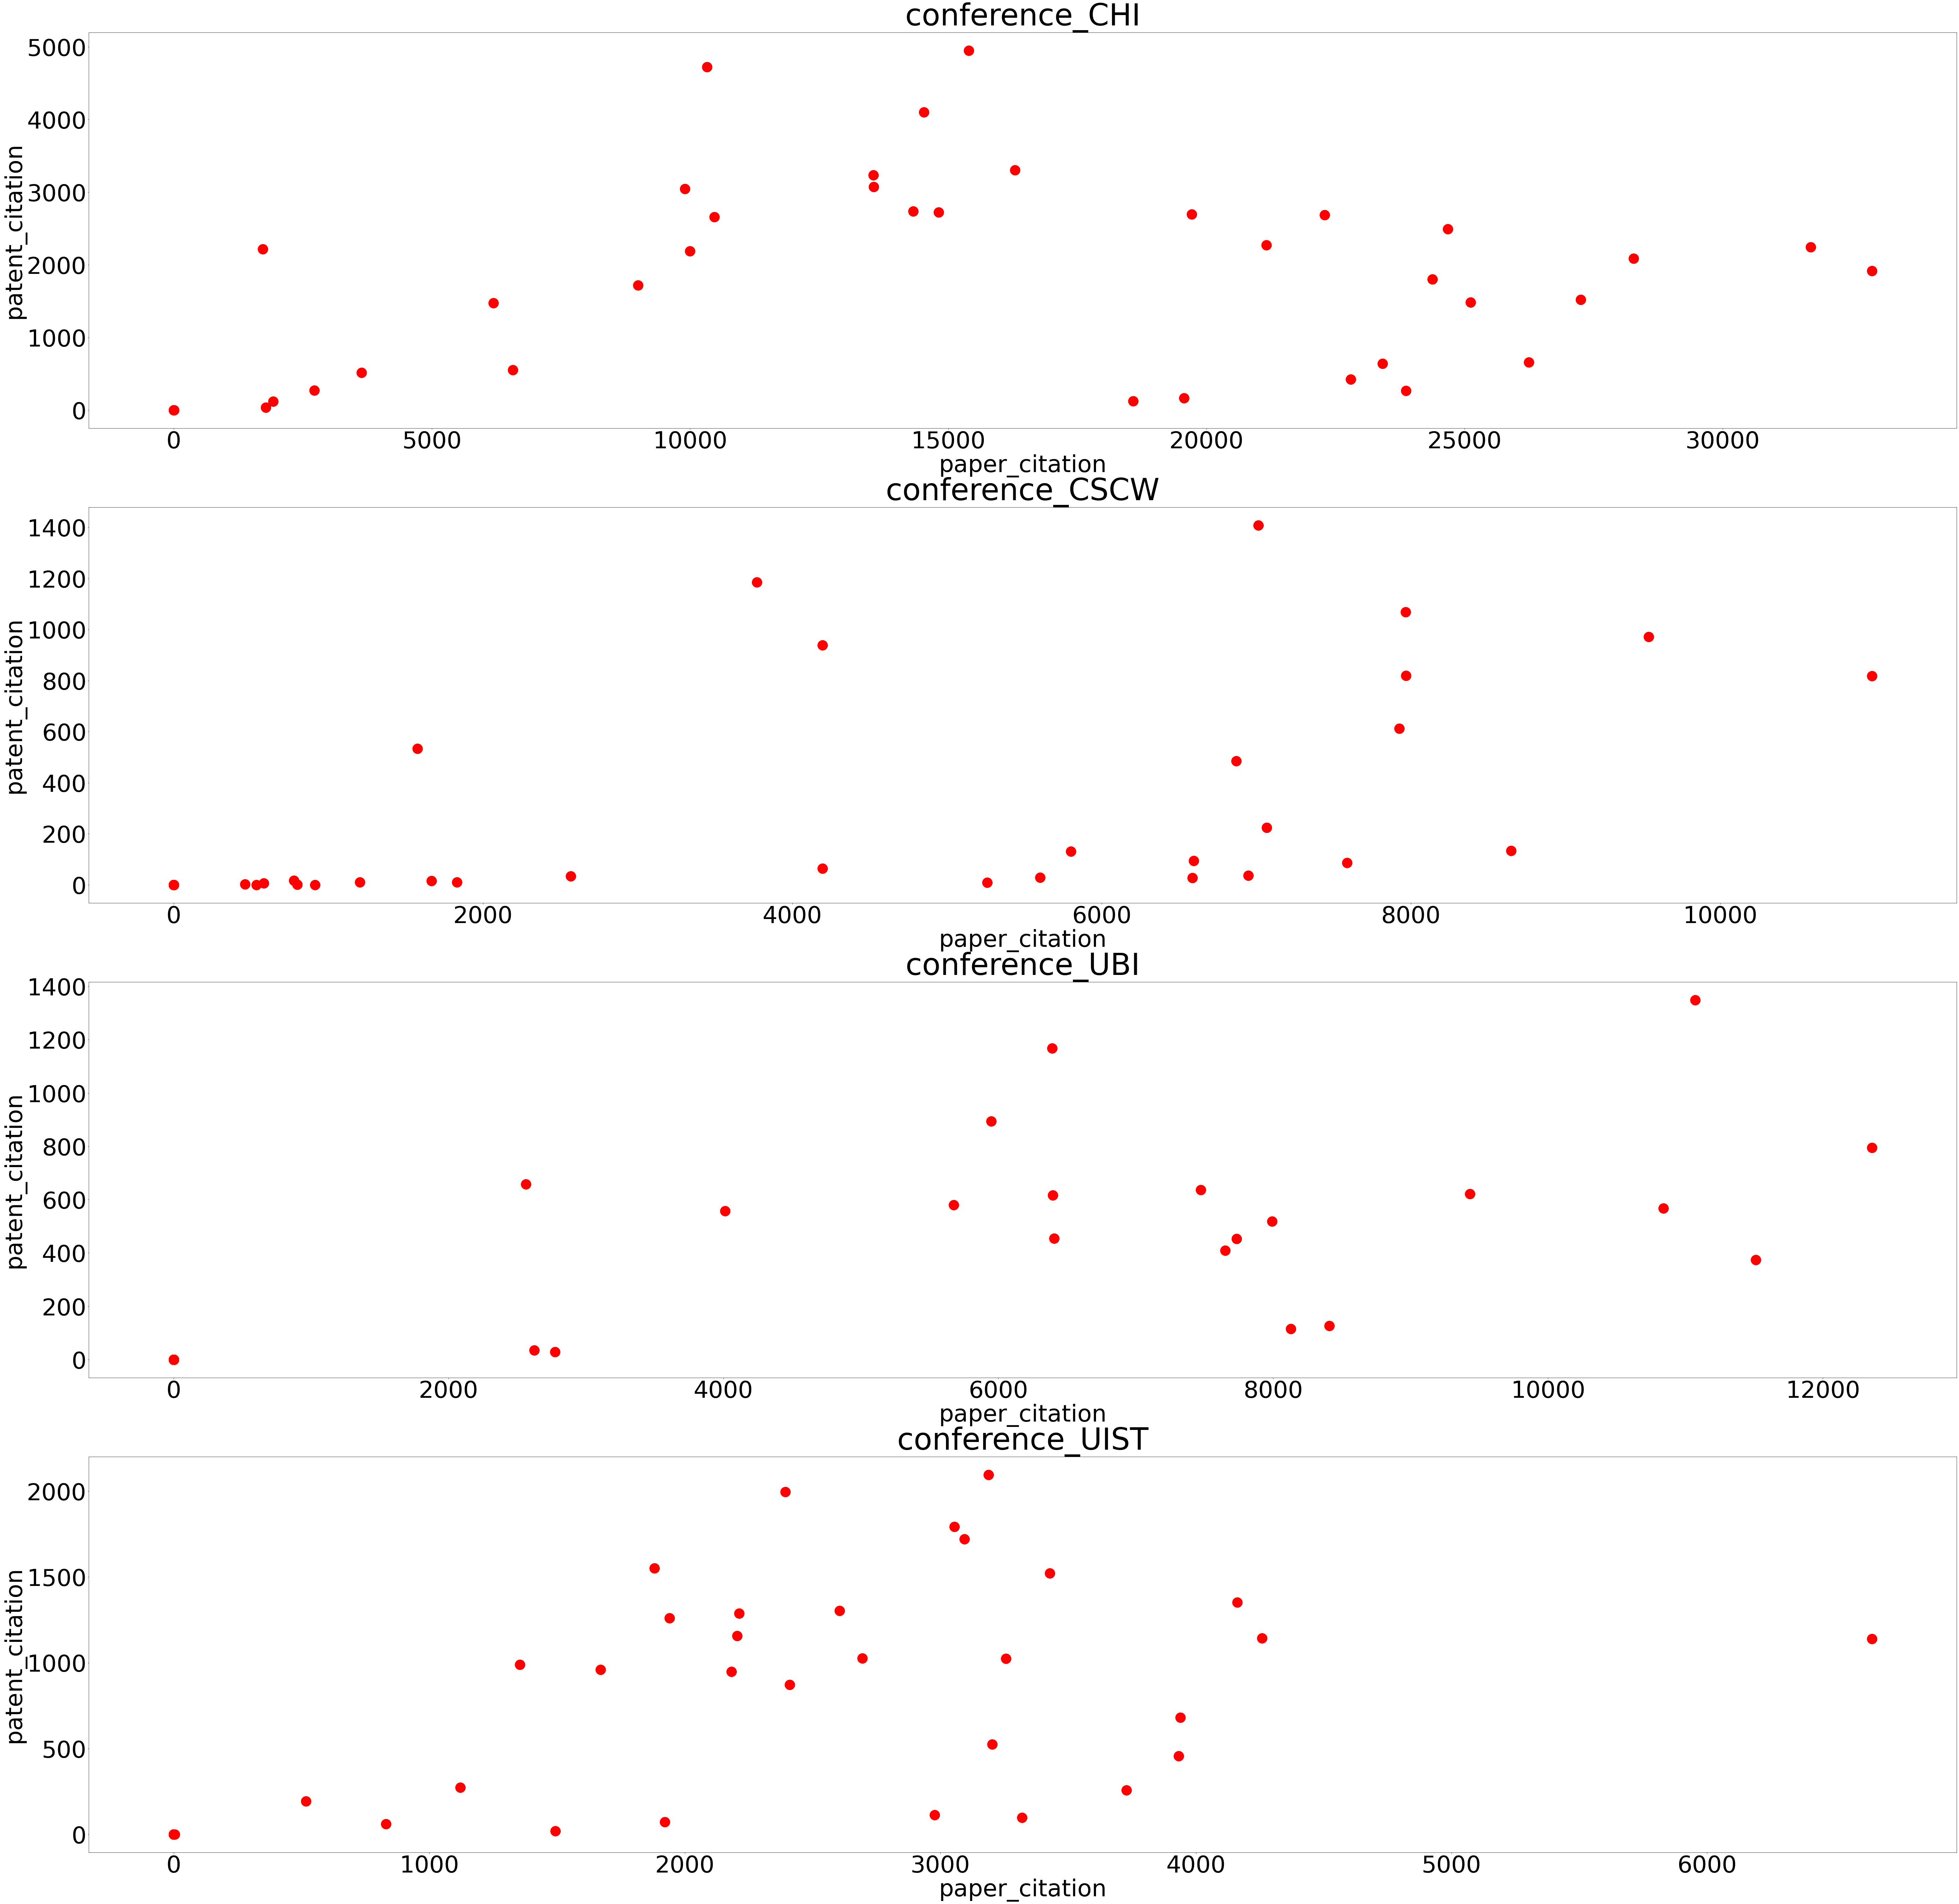

In [19]:
# point visualization
start = 1980
end = 2019
span = end - start
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("patent_citation", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

X_year = [i for i in range (start, end)]

for conf, paperyear_map in paperyear_map_conf.items():
    Y_citingpatentcnt = [0] * span
    Y_citingpapercnt = [0] * span

    citingpatent_map = citingpatent_map_conf[conf]
    citingpaper_map = citingpaper_map_conf[conf]
    for i in range (start, end):
        if str(i) in citingpatent_map.keys():
            Y_citingpatentcnt[i-start] = len(citingpatent_map[str(i)])    
        if str(i) in citingpaper_map.keys():
            Y_citingpapercnt[i-start] = len(citingpaper_map[str(i)])

    axes[plot_idx].plot(Y_citingpapercnt,Y_citingpatentcnt,'o',color='r',markersize=30)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    plot_idx += 1


In [20]:
#------------ analyze VIS4 -------------#
cited_citingpaper_map_conf = {}
notcited_citingpaper_map_conf = {}

cited_paper_map_conf = {}
notcited_paper_map_conf = {}

for conf, df in ori_citingpaper_conf.items():
    cited_citingpaper_map = {}
    notcited_citingpaper_map = {}
    cited_paper_map = {}
    notcited_paper_map = {}
    cited_paper_list = citedpaper_list_conf[conf]
    inv_paperyear_map = inv_paperyear_map_conf[conf]
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        # paperyear
        if cited_paperid not in inv_paperyear_map.keys(): continue
        paperyear = inv_paperyear_map[cited_paperid]
        if cited_paperid in cited_paper_list:
            if paperyear not in cited_citingpaper_map.keys():
                cited_citingpaper_map[paperyear] = []
            if paperyear not in cited_paper_map.keys():
                cited_paper_map[paperyear] = {}
            if cited_paperid not in cited_paper_map[paperyear].keys():
                cited_paper_map[paperyear][cited_paperid] = []
            if citing_paperid not in cited_paper_map[paperyear][cited_paperid]:
                cited_paper_map[paperyear][cited_paperid].append(citing_paperid)
            # if citing_paperid not in cited_citingpaper_map[paperyear]:
            cited_citingpaper_map[paperyear].append(citing_paperid)
        else:
            if paperyear not in notcited_citingpaper_map.keys():
                notcited_citingpaper_map[paperyear] = []
            if paperyear not in notcited_paper_map.keys():
                notcited_paper_map[paperyear] = {}
            if cited_paperid not in notcited_paper_map[paperyear].keys():
                notcited_paper_map[paperyear][cited_paperid] = []
            if citing_paperid not in notcited_paper_map[paperyear][cited_paperid]:
                notcited_paper_map[paperyear][cited_paperid].append(citing_paperid)
            # if citing_paperid not in notcited_citingpaper_map[paperyear]:
            notcited_citingpaper_map[paperyear].append(citing_paperid)
    cited_citingpaper_map_conf[conf] = cited_citingpaper_map
    notcited_citingpaper_map_conf[conf] = notcited_citingpaper_map
    cited_paper_map_conf[conf] = cited_paper_map
    notcited_paper_map_conf[conf] = notcited_paper_map
print(">>> cited paper map construction done")

>>> cited paper map construction done


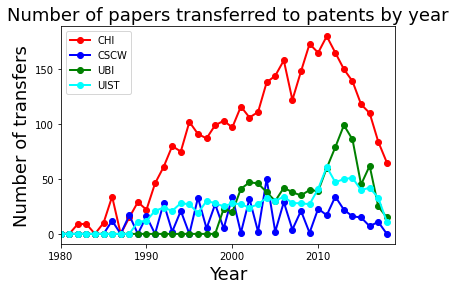

In [21]:
# Number of papers transferred to patents by year
start = 1980
end = 2019
span = end - start
font = {'size'   : 18}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([start,end])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of transfers', fontsize = 18)
plt.title('Number of papers transferred to patents by year', fontsize = 18)

color_list = ['red', 'blue', 'green', 'cyan']
idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    cited_paper_map = cited_paper_map_conf[conf]
    Y_citedpaper_cnt= [0] * span
    for i in range (start, end):
        if str(i) in cited_paper_map.keys():
            Y_citedpaper_cnt[i-start] = len(cited_paper_map[str(i)])
    plt.plot(X_year, Y_citedpaper_cnt, 'o-', label = conf, color = color_list[idx], linewidth = 2)
    idx += 1

plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

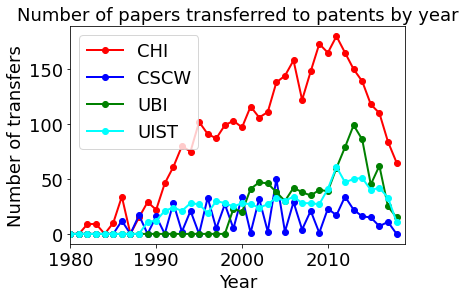

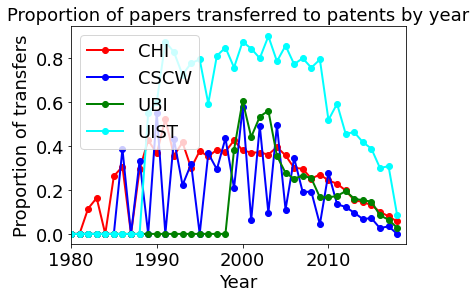

In [22]:
# proportion of papers transferred to patents by year
# Number of papers transferred to patents by year
start = 1980
end = 2019
span = end - start
font = {'size'   : 18}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([start,end])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of transfers', fontsize = 18)
plt.title('Number of papers transferred to patents by year', fontsize = 18)

color_list = ['red', 'blue', 'green', 'cyan']
idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    cited_paper_map = cited_paper_map_conf[conf]
    Y_citedpaper_cnt= [0] * span
    for i in range (start, end):
        if str(i) in cited_paper_map.keys():
            Y_citedpaper_cnt[i-start] = len(cited_paper_map[str(i)])
    plt.plot(X_year, Y_citedpaper_cnt, 'o-', label = conf, color = color_list[idx], linewidth = 2)
    idx += 1

plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()
font = {'size'   : 18}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([start,end])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Proportion of transfers', fontsize = 18)
plt.title('Proportion of papers transferred to patents by year', fontsize = 18)

color_list = ['red', 'blue', 'green', 'cyan']
idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    cited_paper_map = cited_paper_map_conf[conf]
    notcited_paper_map = notcited_paper_map_conf[conf]
    paper_map = cited_paper_map_conf[conf]
    Y_citedpaper_cnt= [0] * span
    for i in range (start, end):
        if str(i) in cited_paper_map.keys():
            Y_citedpaper_cnt[i-start] = len(cited_paper_map[str(i)]) / (len(cited_paper_map[str(i)]) + len(notcited_paper_map[str(i)]))
    plt.plot(X_year, Y_citedpaper_cnt, 'o-', label = conf, color = color_list[idx], linewidth = 2)
    idx += 1

plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

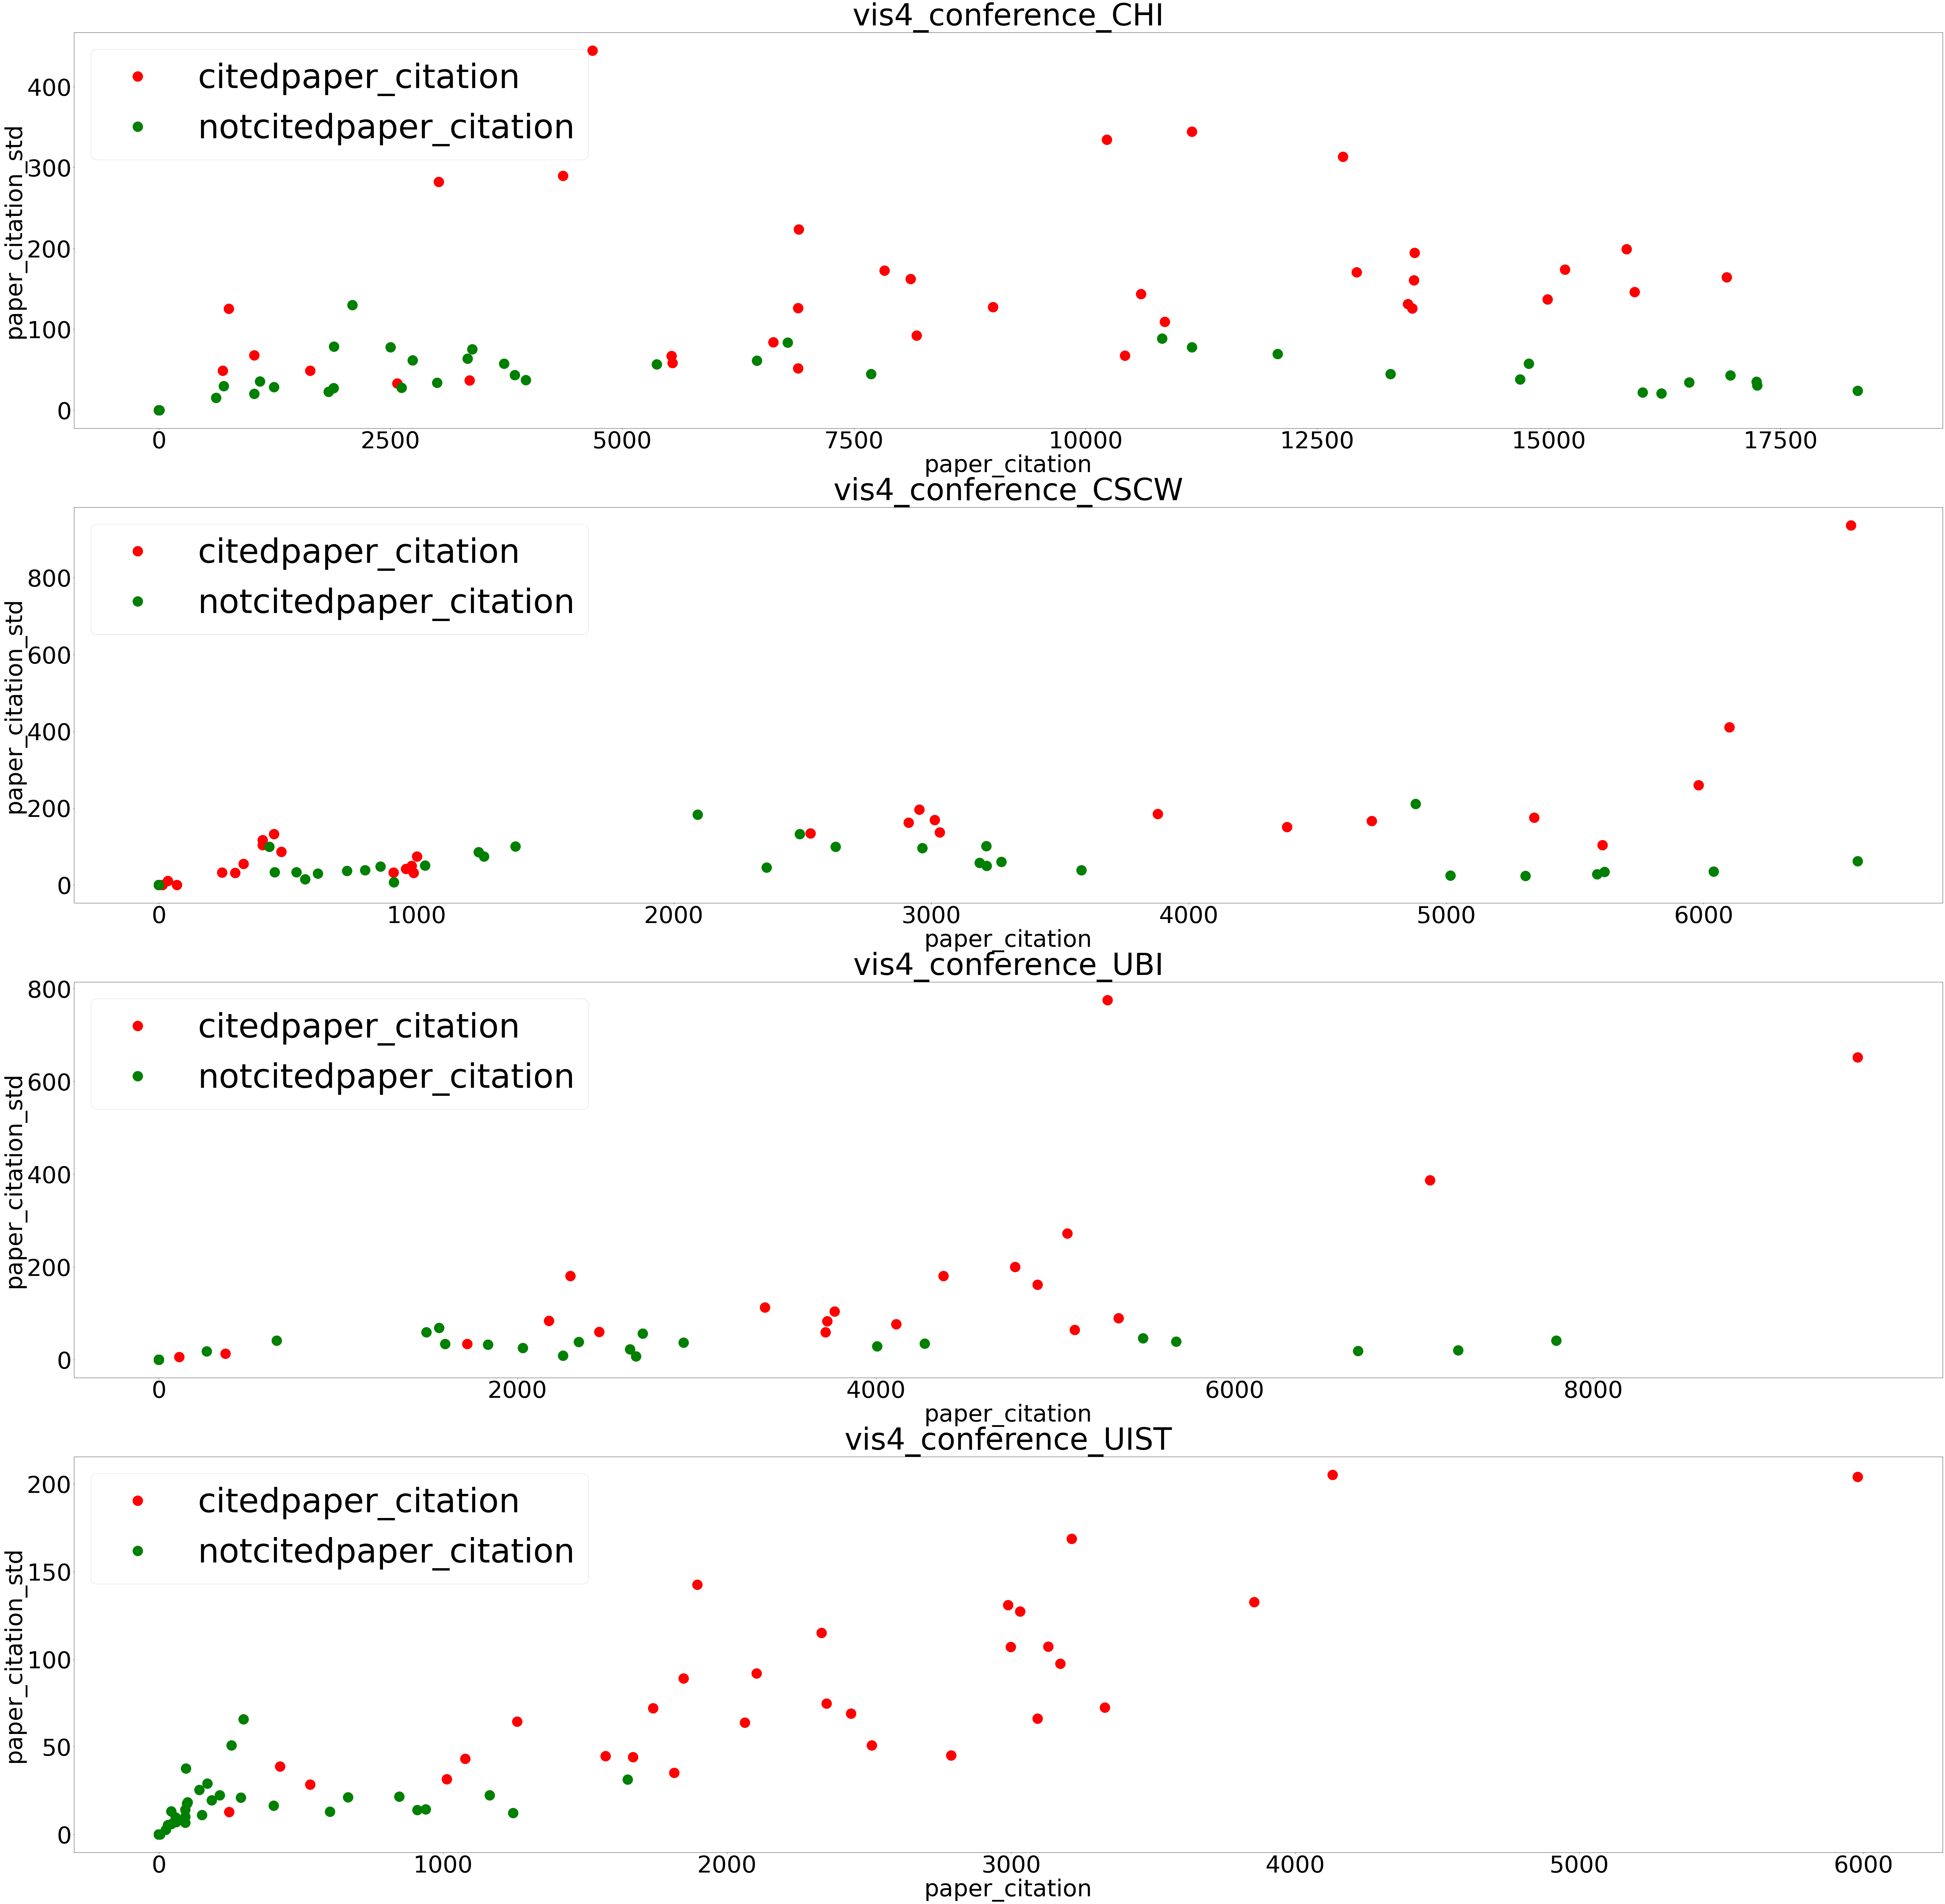

In [23]:
# visualization
start = 1980
end = 2019
span = end - start
X_year = [i for i in range (start, end)]
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("paper_citation_std", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0
for conf, paperyear_map in paperyear_map_conf.items():
    Y_citedpaper_citation_std = [0.0] * span
    Y_notcitedpaper_citation_std = [0.0] * span
    Y_citedpaper_citation_cnt= [0] * span
    Y_notcitedpaper_citation_cnt = [0] * span
    cited_totalcitation = 0
    notcited_totalcitation = 0

    cited_citingpaper_map = cited_citingpaper_map_conf[conf]
    notcited_citingpaper_map = notcited_citingpaper_map_conf[conf]
    cited_paper_map = cited_paper_map_conf[conf]
    notcited_paper_map = notcited_paper_map_conf[conf]
    for i in range (start, end):
        if str(i) in cited_citingpaper_map.keys():
            Y_citedpaper_citation_cnt[i-start] = len(cited_citingpaper_map[str(i)])
            cited_totalcitation += len(cited_citingpaper_map[str(i)])
        if str(i) in notcited_citingpaper_map.keys():
            Y_notcitedpaper_citation_cnt[i-start] = len(notcited_citingpaper_map[str(i)])
            notcited_totalcitation += len(notcited_citingpaper_map[str(i)])

    for i in range (start, end):
        if str(i) in cited_paper_map.keys():
            citing_list = []
            for key,val in cited_paper_map[str(i)].items():
                citing_list.append(len(val))
            # print(">>> cited conf{} list{}".format(conf, citing_list))
            Y_citedpaper_citation_std[i-start] = np.std(citing_list)
        if str(i) in notcited_paper_map.keys():
            citing_list = []
            for key,val in notcited_paper_map[str(i)].items():
                citing_list.append(len(val))
            # print(">>> notcited conf{} list{}".format(conf, citing_list))
            Y_notcitedpaper_citation_std[i-start] = np.std(citing_list)

    axes[plot_idx].plot(Y_citedpaper_citation_cnt,Y_citedpaper_citation_std,'o',label='citedpaper_citation',color='r',markersize=30)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx].plot(Y_notcitedpaper_citation_cnt,Y_notcitedpaper_citation_std,'o',label='notcitedpaper_citation',color='g',markersize=30)
    axes[plot_idx].legend(loc = 'upper left', prop={'size': 100})
    axes[plot_idx].set_title('vis4_conference_{}'.format(conf), fontsize=90)
    plot_idx += 1

In [24]:
# TODO: apply get_patentid
single_citingpaper_map_conf = {}
for conf, df in ori_citingpaper_conf.items():
    single_citingpaper_map = {}
    for row in df.iterrows():
        citing_paperid = str(row[1]).split(',')[0].split('\n')[0].split()[1]
        cited_paperid = str(row[1]).split(',')[0].split('\n')[1].split()[1]
        if cited_paperid not in single_citingpaper_map.keys():
            single_citingpaper_map[cited_paperid] = []
        if citing_paperid not in single_citingpaper_map[cited_paperid]:
            single_citingpaper_map[cited_paperid].append(citing_paperid)
    single_citingpaper_map_conf[conf] = single_citingpaper_map
print(">>> single citing paper map construction done")

>>> single citing paper map construction done


In [25]:
# TODO: apply get_patentid
single_citingpatent_map_conf = {}
for conf, df in ori_citingpatent_conf.items():
    single_citingpatent_map = {}
    for row in df.iterrows():
        paperid = str(row[1]).split(',')[0].split('\n')[3].split()[1] # paperid
        patentid = str(row[1]).split(',')[0].split('\n')[4].split()[1] # patentid

        if paperid not in single_citingpatent_map.keys():
            single_citingpatent_map[paperid] = []
        if patentid not in single_citingpatent_map[paperid]:
            single_citingpatent_map[paperid].append(patentid)

    single_citingpatent_map_conf[conf] = single_citingpatent_map
print(">>> done single citing data")

>>> done single citing data


In [26]:
single_citingpatent_map_conf["CHI"]
# ori_citingpatent_conf["CHI"].head(3)

{'2134161165': ['10001804',
  '6024576',
  '6028593',
  '6057828',
  '6078308',
  '6088019',
  '6100874',
  '6104158',
  '6128006',
  '6131097',
  '6154198',
  '6154201',
  '6219032',
  '6243078',
  '6246390',
  '6252579',
  '6252583',
  '6281651',
  '6288705',
  '6292174',
  '6300936',
  '6343349',
  '6366272',
  '6374255',
  '6424356',
  '6433771',
  '6437770',
  '6437771',
  '6469692',
  '6639581',
  '6686911',
  '6697044',
  '6697048',
  '6704001',
  '6705871',
  '6781569',
  '6801008',
  '6850222',
  '6859819',
  '6894678',
  '6956558',
  '7023423',
  '7024625',
  '7038667',
  '7039866',
  '7091950',
  '7131073',
  '7148875',
  '7158112',
  '7168042',
  '7191191',
  '7199790',
  '7249951',
  '7253803',
  '7265750',
  '7327348',
  '7345672',
  '7423631',
  '7456821',
  '7489309',
  '7561141',
  '7696978',
  '7728820',
  '7812820',
  '7821496',
  '7821498',
  '7944435',
  '7978183',
  '7978186',
  '7982720',
  '8031181',
  '8049734',
  '8059088',
  '8059104',
  '8059105',
  '8063892

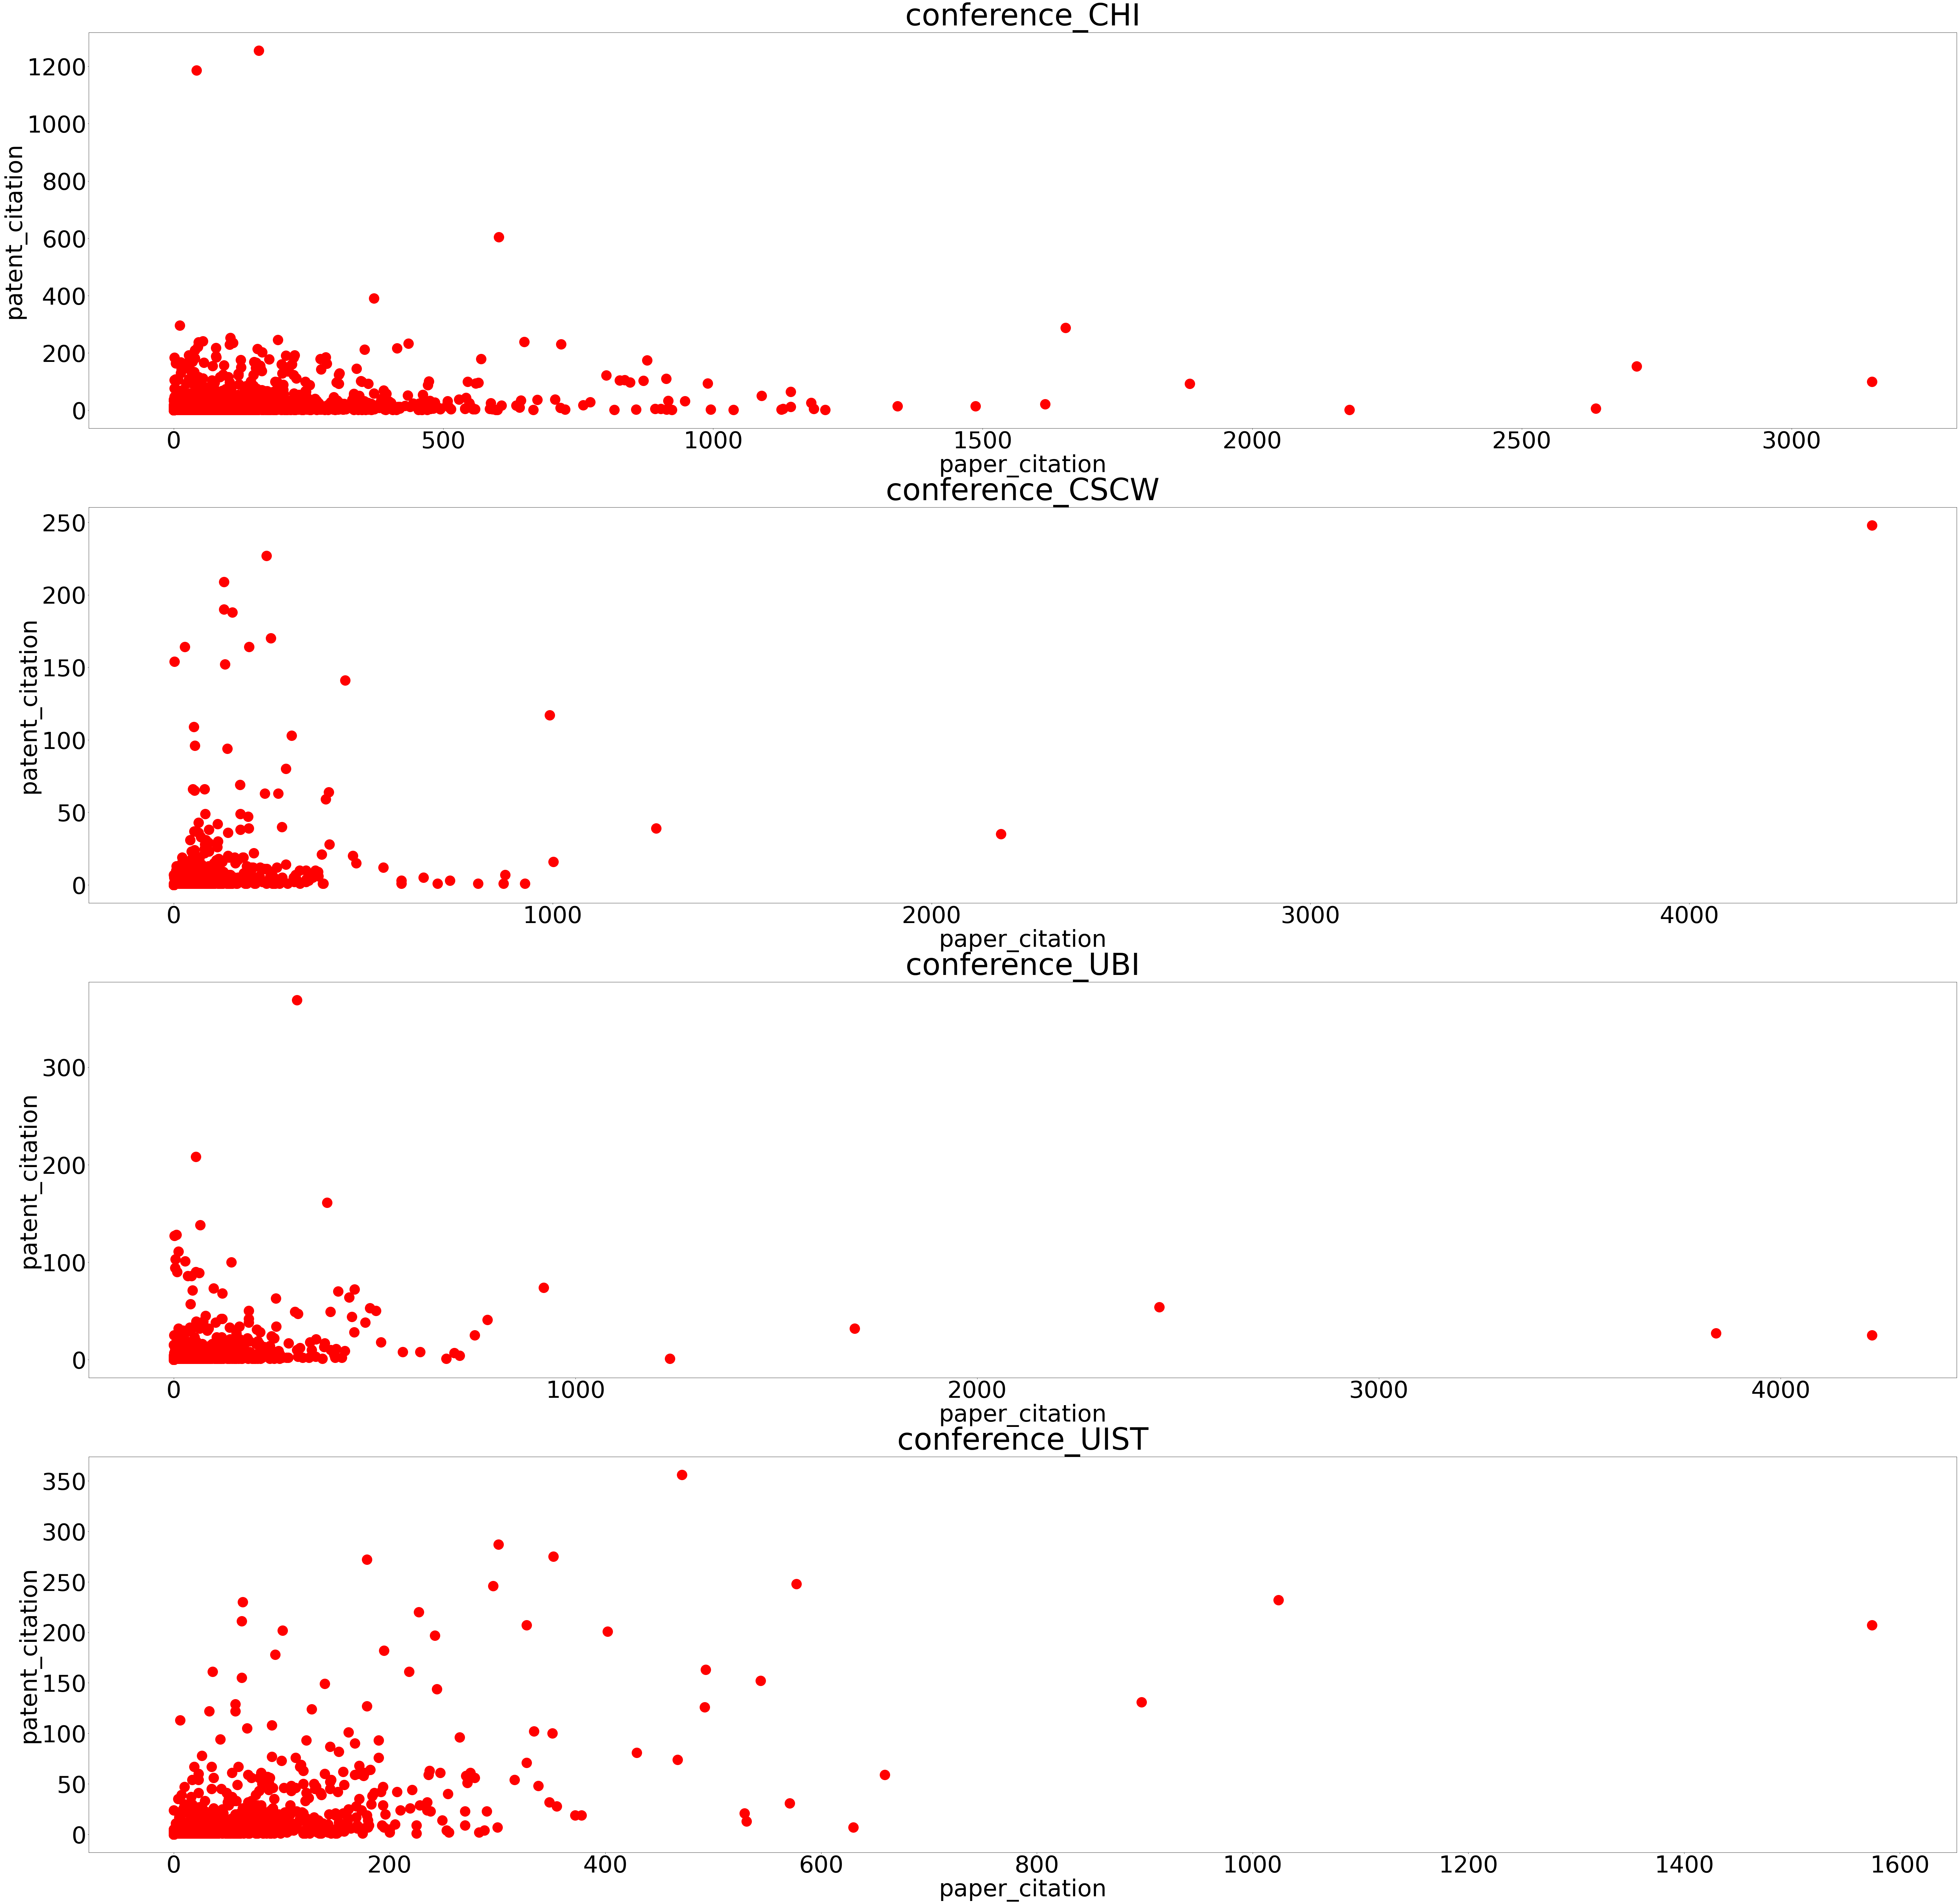

In [27]:
# single point visualization
fig = plt.figure(figsize=(100,100))
axes = fig.subplots(nrows=4)

for ax_c in axes:
    ax_c.set_xlabel("paper_citation", fontsize=70)
    ax_c.set_ylabel("patent_citation", fontsize=70)
    ax_c.tick_params(labelsize=70)

plot_idx = 0

for conf, paperyear_map in paperyear_map_conf.items():
    citingpatent_map = single_citingpatent_map_conf[conf]
    citingpaper_map = single_citingpaper_map_conf[conf]
    Y_citingpatentcnt = [0] * max(len(citingpatent_map), len(citingpaper_map))
    Y_citingpapercnt = [0] * max(len(citingpatent_map), len(citingpaper_map))
    idx = 0
    for key, val in citingpatent_map.items():
        Y_citingpatentcnt[idx] = len(val)
        if key in citingpaper_map:
            Y_citingpapercnt[idx] = len(citingpaper_map[key])
        else:
             Y_citingpapercnt[idx] = 0
        idx += 1
    axes[plot_idx].plot(Y_citingpapercnt,Y_citingpatentcnt,'o',color='r',markersize=30)
    axes[plot_idx].set_title('conference_{}'.format(conf), fontsize=90)
    plot_idx += 1


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# old_df_patent_year = pd.read_csv('../dataAug10/mergeversiondata/patent_year_inventor_HCI_oldmerge.tsv')[["patent_id","date","conf_id"]]
# new_df_patent_year = pd.read_csv('../dataAug10/mergeversiondata/patent_year_inventor_new.tsv')[["patent_id","date","conf_id"]]
# df_patent_year = pd.read_csv('../dataAug10/mergeversiondata/patent_year_inventor_HCI.tsv')[["patent_id","date","conf_id"]]
# def get_conf_name(x):
#     if str(x) == "1163450153": return "CHI"
#     if str(x) == "1195049314": return "CSCW"
#     if str(x) == "1166315290": return "UIST"
#     if str(x) == "1171345118": return "UBI"
#     return x
# df_patent_year = df_patent_year.append(old_df_patent_year, ignore_index=True)
# df_patent_year = df_patent_year.append(new_df_patent_year, ignore_index=True)
# df_patent_year = df_patent_year.apply(get_conf_name).drop_duplicates()
# df_patent_year['patent_year'] = pd.DatetimeIndex(df_patent_year['date']).year
# df_patent_year['patent_id'] = df_patent_year['patent_id'].apply(str)
# df_paper_pc2s_year = df_paper_pc2s_year.drop(columns=["conf_id"])
# # df_patent_paper_year = df_patent_year.merge(df_paper_pc2s_year,left_on='patent_id',right_on='patent')
# df_patent_paper_year = df_paper_pc2s_year.merge(df_patent_year,left_on='patent',right_on='patent_id')
# df_patent_paper_year['patent_paper_lag'] = df_patent_paper_year['patent_year'] - df_patent_paper_year['year']
# df_patent_paper_year = df_patent_paper_year.drop_duplicates()
# df_patent_paper_year = df_patent_paper_year.groupby(["magid", "patent_id"]).first().reset_index()
import pandas as pd
df_patent_paper_year = pd.read_csv("../dataAug10/mergeversiondata/df_patent_paper_year.tsv")
df_patent_paper_year.head(3)

Unnamed: 0.1    magid  patent_id        date conf_id  patent_year  \
0             0  9453182    8184175  2012-05-22     UBI         2012   
1             1  9453182    9081413  2015-07-14     UBI         2015   
2             2  9453182    9571785  2017-02-14     UBI         2017   

   Unnamed: 0 reftype  confscore   patent  year  patent_paper_lag  
0       850.0     oth         10  8184175  2005                 7  
1      1842.0     app          8  9081413  2005                10  
2      2622.0     app         10  9571785  2005                12

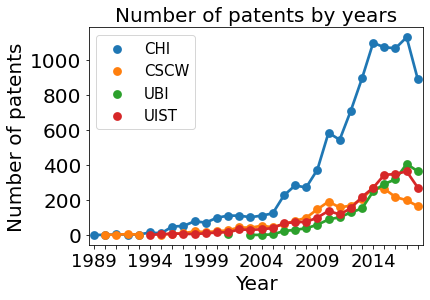

In [2]:
# related patents over year
df_temp = df_patent_paper_year.groupby(['conf_id','patent_id','patent_year']).agg('count').reset_index()
df_temp = df_temp[['conf_id','patent_id','patent_year']]
df_temp = df_temp.groupby(['conf_id','patent_year']).agg('count').reset_index()


df_temp = df_temp[(df_temp['patent_year']>1985) & (df_temp['patent_year']<2020)]
plt_ = sns.pointplot(x="patent_year", y="patent_id", hue="conf_id", data=df_temp)
plt.ylabel('Number of patents',fontsize = 20)
plt.title('Number of patents by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('Year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [3]:
# df_patent_paper_year.head(2)
# df_patent_paper_year.loc[df_patent_paper_year["year"]==2019]
# df_paper_pc2s_year.loc[df_paper_pc2s_year["year"]==2019]
# len(paperyear_map_conf["CHI"]['2019'])
# df_paper_pc2s_year

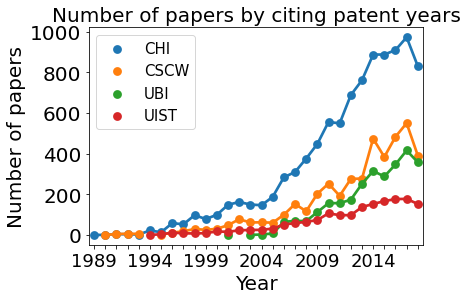

In [5]:
# related patents over year
# df_temp = df_patent_paper_year.groupby(['conf_id','magid','year']).agg('count').reset_index()
# df_temp = df_temp[['conf_id','magid','year']]
# df_temp = df_temp.groupby(['conf_id','year']).agg('count').reset_index()
df_temp = df_patent_paper_year.groupby(['conf_id','magid','patent_year']).agg('count').reset_index()
df_temp = df_temp[['conf_id','magid','patent_year']]
df_temp = df_temp.groupby(['conf_id','patent_year']).agg('count').reset_index()


df_temp = df_temp[(df_temp['patent_year']>1985) & (df_temp['patent_year']<2020)]
plt_ = sns.pointplot(x="patent_year", y="magid", hue="conf_id", data=df_temp)
plt.ylabel('Number of papers',fontsize = 20)
plt.title('Number of papers by citing patent years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.xlabel('Year', fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

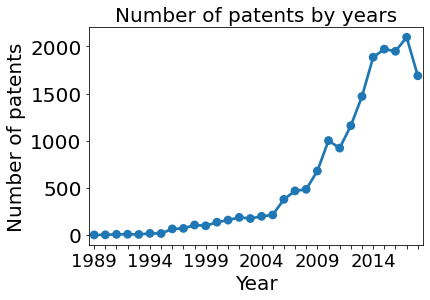

In [6]:
# related patents over year
df_temp = df_patent_paper_year.groupby(['patent_id','patent_year']).agg('count').reset_index()
df_temp = df_temp[['patent_id','patent_year']]
df_temp = df_temp.groupby(['patent_year']).agg('count').reset_index()


df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_id", data=df_temp)
plt.ylabel('Number of patents',fontsize = 20)
plt.title('Number of patents by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
#plt.legend(fontsize =15)
plt.xlabel('Year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [7]:
import numpy as np
subfield_list = ['HCI']
df_category = pd.read_csv("../data/category.tsv")
transfer_year = []
for subfield in subfield_list:
    df_temp = df_patent_paper_year[df_patent_paper_year['conf_id'].isin(df_category.loc[df_category['subfield']==subfield]['conf_name'].tolist())]
    print("sunfield {} mean papaer to patent transfer time".format(subfield))
    print(np.mean(list(df_temp['patent_paper_lag'])))
    transfer_year.append(np.mean(list(df_temp['patent_paper_lag'])))

sunfield HCI mean papaer to patent transfer time
13.391824694479562


In [8]:
conf_list = ['CHI','CSCW','UBI','UIST']
df_category = pd.read_csv("../data/category.tsv")
transfer_year = []
for conf in conf_list:
    df_temp = df_patent_paper_year[df_patent_paper_year['conf_id']==conf]
    print("conference {} mean papaer to patent transfer time".format(conf))
    print(np.mean(list(df_temp['patent_paper_lag'])))
    transfer_year.append(np.mean(list(df_temp['patent_paper_lag'])))

conference CHI mean papaer to patent transfer time
13.054343090268151
conference CSCW mean papaer to patent transfer time
16.153170560337255
conference UBI mean papaer to patent transfer time
11.388189083028578
conference UIST mean papaer to patent transfer time
11.031939605110336


Text(0.5, 0, '')

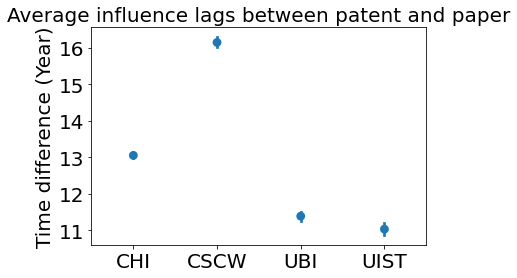

In [9]:
# the average lag of science that influence patent
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_patent_paper_year, order = ['CHI','CSCW','UBI','UIST'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average influence lags between patent and paper',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

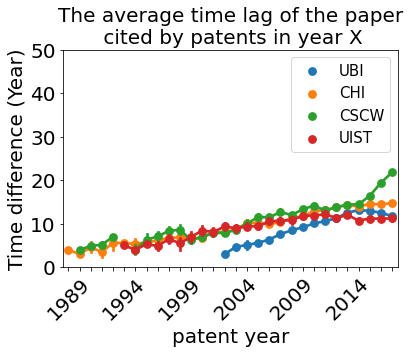

In [10]:
# the average lag of science that influence patent
df_temp = df_patent_paper_year[df_patent_paper_year['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The average time lag of the paper\n cited by patents in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0, 50)
plt.legend(fontsize =15)
plt.xlabel('patent year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


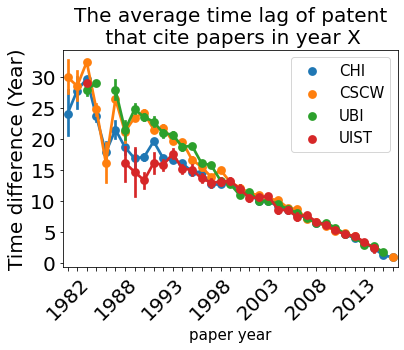

In [11]:
# the average lag of science that influence patent
df_temp = df_patent_paper_year.sort_values('year', ascending = False).reset_index(drop=True)
df_temp = df_temp[df_temp['year']>1977]
plt_ = sns.pointplot(x="year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The average time lag of patent\n that cite papers in year X',fontsize = 20)
plt.xticks(rotation=90)
plt.xticks(rotation=45, fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('paper year', fontsize =15)
plt.yticks(fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Text(0.5, 0, '')

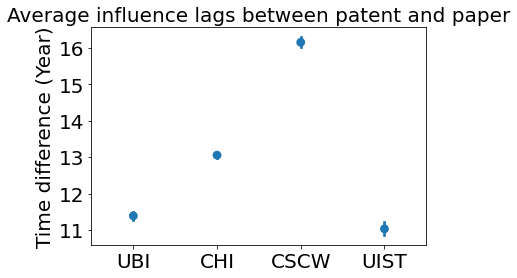

In [12]:
# the average lag of science that influence patent
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_patent_paper_year, join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average influence lags between patent and paper',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

Text(0.5, 0, '')

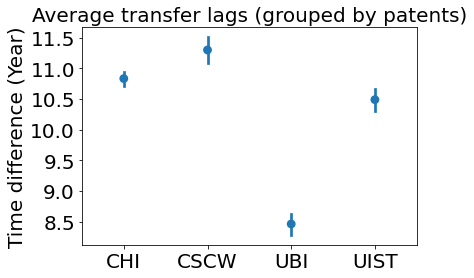

In [13]:
# the time lag of newest paper in a patent
df_temp = df_patent_paper_year.groupby(['patent_id','patent_year','conf_id'])['patent_paper_lag'].agg('min').reset_index()
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_temp, order = ['CHI','CSCW','UBI','UIST'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average transfer lags (grouped by patents)',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

Text(0.5, 0, '')

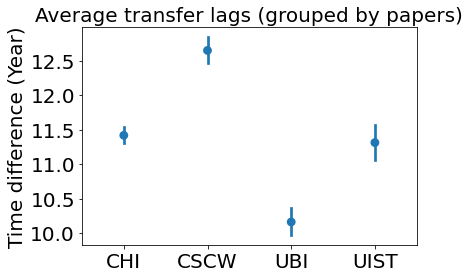

In [14]:
# the time lag of paper to newest patent
df_temp = df_patent_paper_year.groupby(['magid','patent_year','conf_id'])['patent_paper_lag'].agg('min').reset_index()
sns.pointplot(x="conf_id", y="patent_paper_lag", data=df_temp, order = ['CHI','CSCW','UBI','UIST'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average transfer lags (grouped by papers)',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

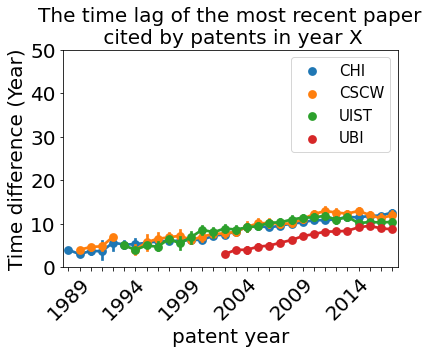

In [15]:
# the time lag of newest paper in a patent
df_temp = df_patent_paper_year.groupby(['patent_id','patent_year','conf_id'])['patent_paper_lag'].agg('min').reset_index()
df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The time lag of the most recent paper\n cited by patents in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(0, 50)
plt.legend(fontsize =15)
plt.xlabel('patent year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

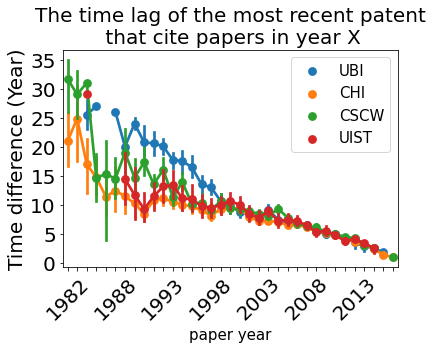

In [19]:
# the first patent that adopts a paper
df_temp = df_patent_paper_year.groupby(['magid','year',"conf_id"])['patent_paper_lag'].agg('min').reset_index()
df_temp = df_temp[df_temp['year']>1977]
plt_ = sns.pointplot(x="year", y="patent_paper_lag", hue="conf_id", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The time lag of the most recent patent\n that cite papers in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('paper year', fontsize =15)
plt.yticks(fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

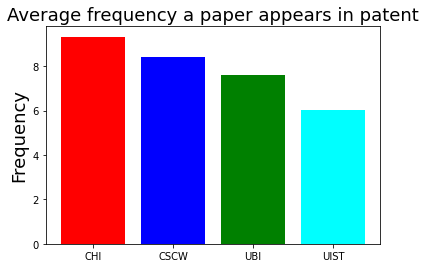

In [22]:
## Plot aggregate average times a paper gets transferred to patents 
## Only consider papers that get transferred
font = {'size'   : 18}
patent_CHI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CHI"].groupby(['year','magid'])['patent_id'].count()}).reset_index()
patent_CSCW_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CSCW"].groupby(['year','magid'])['patent_id'].count()}).reset_index()
patent_UBI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UBI"].groupby(['year','magid'])['patent_id'].count()}).reset_index()
patent_UIST_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UIST"].groupby(['year','magid'])['patent_id'].count()}).reset_index()
f_CHI = patent_CHI_year['count'].sum()/len(patent_CHI_year[patent_CHI_year['count']>0])
f_CSCW = patent_CSCW_year['count'].sum()/len(patent_CSCW_year[patent_CSCW_year['count']>0])
f_UBI = patent_UBI_year['count'].sum()/len(patent_UBI_year[patent_UBI_year['count']>0])
f_UIST = patent_UIST_year['count'].sum()/len(patent_UIST_year[patent_UIST_year['count']>0])

prop = [f_CHI, f_CSCW, f_UBI, f_UIST]
bars = ('CHI', 'CSCW', 'UBI', 'UIST')
plt.bar(bars, prop, color=['red', 'blue', 'green', 'cyan'])
plt.title('Average frequency a paper appears in patent', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.rc('font', **font)

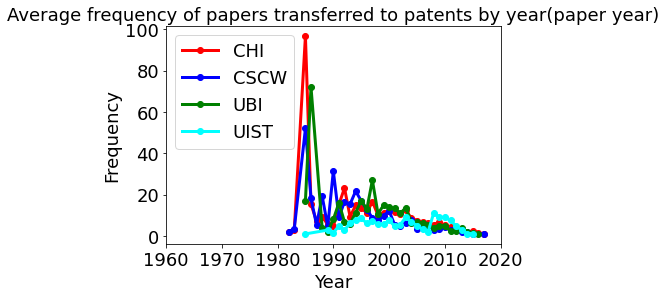

In [23]:
## Plot aggregate average number of times a paper gets transferred to patents per year 
f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby('year')['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0].groupby('year')['count'].count()
f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('year')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0].groupby('year')['count'].count()
f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('year')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0].groupby('year')['count'].count()
f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('year')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0].groupby('year')['count'].count()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average frequency of papers transferred to patents by year(paper year)', fontsize = 18)
plt.plot(f_CHI_year.index, f_CHI_year, 'o-', label = 'CHI', color = 'red', linewidth = 3)
plt.plot(f_CSCW_year.index, f_CSCW_year, 'o-', label = 'CSCW', color = 'blue', linewidth = 3)
plt.plot(f_UBI_year.index, f_UBI_year, 'o-', label = 'UBI', color = 'green', linewidth = 3)
plt.plot(f_UIST_year.index, f_UIST_year, 'o-', label = 'UIST', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()


In [24]:
patent_CHI_year[patent_CHI_year['count'] > 200]

year       magid  count
16    1985  1967451823    733
197   1992  2064143410    693
1171  2002  2005198142    256

/local/home/yujielu/anaconda3/envs/mixer/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CHI paper transfer frequency')

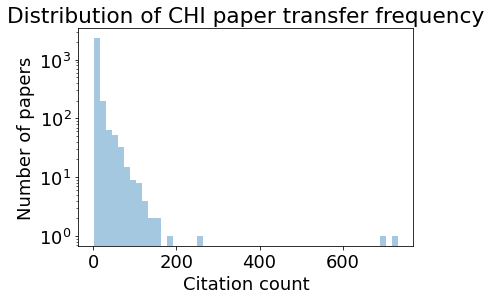

In [25]:
patent_CHI_freq = patent_CHI_year
sns.distplot(patent_CHI_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of CHI paper transfer frequency')

Text(0.5, 1.0, 'Distribution of CSCW paper transfer frequency')

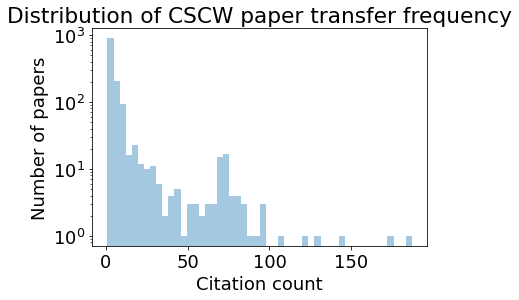

In [26]:
patent_CSCW_freq = patent_CSCW_year
sns.distplot(patent_CSCW_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of CSCW paper transfer frequency')

Text(0.5, 1.0, 'Distribution of UBI paper transfer frequency')

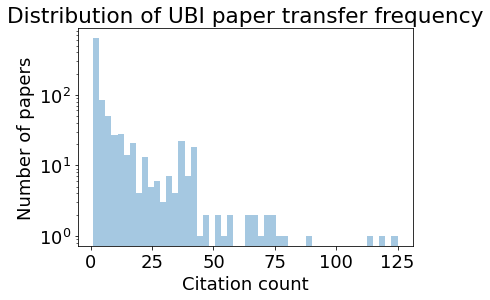

In [27]:
patent_UBI_freq = patent_UBI_year
sns.distplot(patent_UBI_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of UBI paper transfer frequency')

Text(0.5, 1.0, 'Distribution of UIST paper transfer frequency')

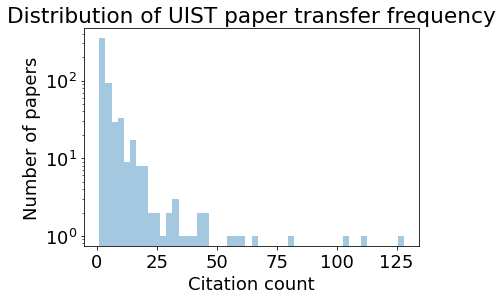

In [28]:
patent_UIST_freq = patent_UIST_year
sns.distplot(patent_UIST_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of UIST paper transfer frequency')

In [29]:
df_patent_paper_year.head(10)
# df_tmp = df_patent_paper_year[(df_patent_paper_year['patent_year'] == 2000) | (df_patent_paper_year['patent_year'] == 2000)]
# df_tmp.shape[0]
# df_tmp.drop_duplicates(['paperid']).shape[0]

Unnamed: 0.1     magid  patent_id        date conf_id  patent_year  \
0             0   9453182    8184175  2012-05-22     UBI         2012   
1             1   9453182    9081413  2015-07-14     UBI         2015   
2             2   9453182    9571785  2017-02-14     UBI         2017   
3             3   9556902    9218163  2015-12-22     UBI         2015   
4             4  12317253    8880583  2014-11-04     CHI         2014   
5             5  30600765    9906605  2018-02-27     UBI         2018   
6             6  31544869    7593000  2009-09-22     UBI         2009   
7             7  31544869    8174503  2012-05-08     UBI         2012   
8             8  31544869    8718672  2014-05-06     UBI         2014   
9             9  31544869    9497594  2016-11-15     UBI         2016   

   Unnamed: 0 reftype  confscore   patent  year  patent_paper_lag  
0       850.0     oth         10  8184175  2005                 7  
1      1842.0     app          8  9081413  2005                10  
2      2622.0     app         10  9571785  2005                12  
3      2034.0     app         10  9218163  2011                 4  
4     14674.0     app          9  8880583  2001                13  
5      3283.0     exm         10  9906605  2014                 4  
6       501.0     oth          4  7593000  2009                 0  
7       836.0     oth          5  8174503  2009                 3  
8         NaN     app          5  8718672  2009                 5  
9         NaN     app          5  9497594  2009                 7

/tmp/ipykernel_3697472/1596044319.py:49: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图，accumulative时，对角线上方皆为0


<AxesSubplot:>

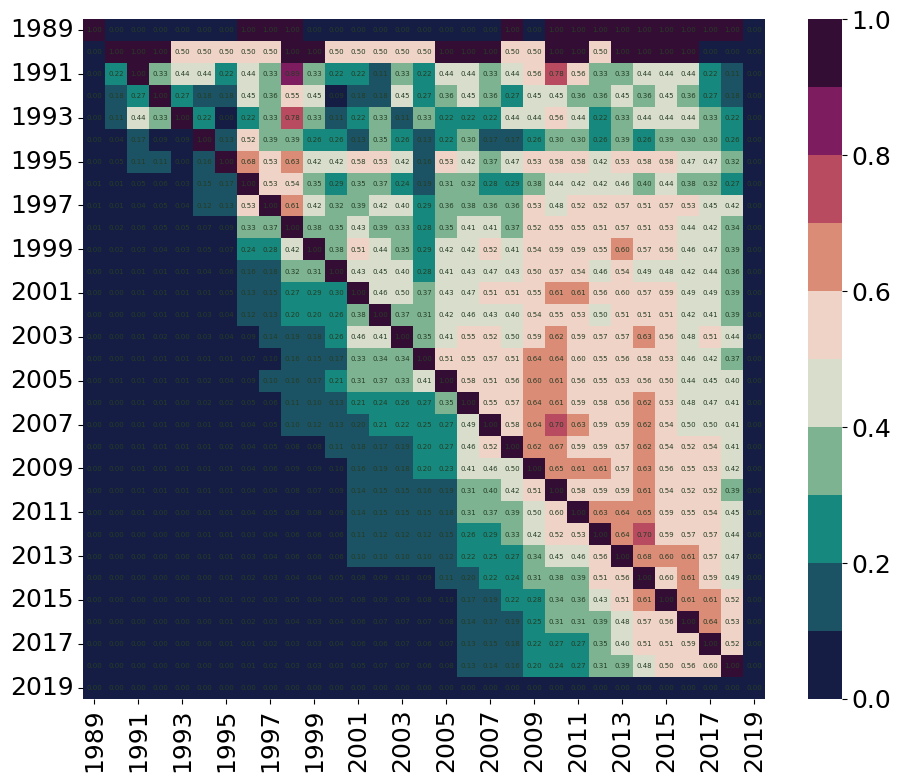

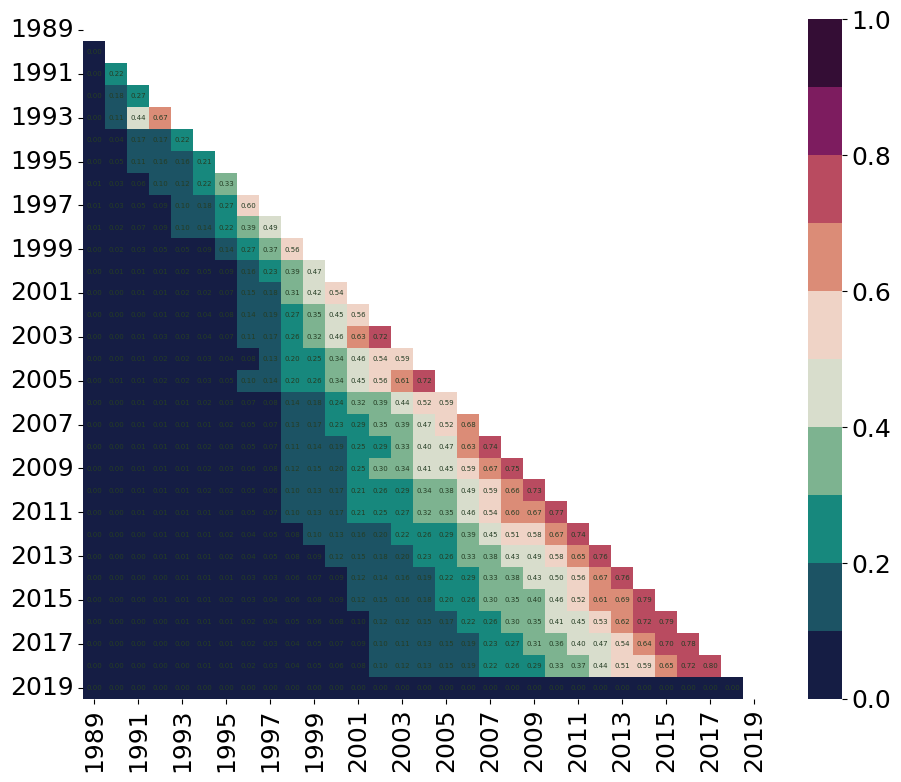

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable

year_data = np.random.random((31,31))
accu_year_data = np.random.random((31,31))
for year_x in range(1989,2020):
    for year_y in range(1989,2020):
        df_x = df_patent_paper_year[(df_patent_paper_year['patent_year'] == year_x)].drop_duplicates(['magid'])
        df_y = df_patent_paper_year[(df_patent_paper_year['patent_year'] == year_y)].drop_duplicates(['magid'])
        df_intersected = pd.merge(df_x, df_y, on=['magid'], how='inner')
        dup_cnt = df_intersected.shape[0]
        x_cnt = df_x.shape[0]
        y_cnt = df_y.shape[0]
        year_data[year_x-1989][year_y-1989] = dup_cnt / x_cnt if x_cnt > 0 else 0
        
        accu_df_x = df_patent_paper_year[(df_patent_paper_year['patent_year'] == year_x)].drop_duplicates(['magid'])
        accu_df_y = df_patent_paper_year[(df_patent_paper_year['patent_year'] <= year_y)].drop_duplicates(['magid'])
        accu_df_intersected = pd.merge(accu_df_x, accu_df_y, on=['magid'], how='inner')
        accu_dup_cnt = accu_df_intersected.shape[0]
        accu_x_cnt = accu_df_x.shape[0]
        accu_y_cnt = accu_df_y.shape[0]
        accu_year_data[year_x-1989][year_y-1989] = accu_dup_cnt / accu_x_cnt if accu_x_cnt > 0 else 0

x_tick=[year for year in range(1989,2020)]
y_tick=[year for year in range(1989,2020)]
dcorr=pd.DataFrame(year_data,index=y_tick,columns=x_tick)

plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=dcorr,
            vmax=1, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,#图中数字文本显示
            fmt=".2f",#格式化输出图中数字，即保留小数位数等
            annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
           )

accu_dcorr=pd.DataFrame(accu_year_data,index=y_tick,columns=x_tick)
plt.figure(figsize=(11, 9),dpi=100)
sns.heatmap(data=accu_dcorr,
            vmax=1, 
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            annot=True,
            fmt=".2f",
            annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},
            mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图，accumulative时，对角线上方皆为0
           )

/tmp/ipykernel_3697472/1244293156.py:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图，accumulative时，对角线上方皆为0
/tmp/ipykernel_3697472/1244293156.py:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图，accumulative时，对角线上方皆为0
/tmp/ipykern

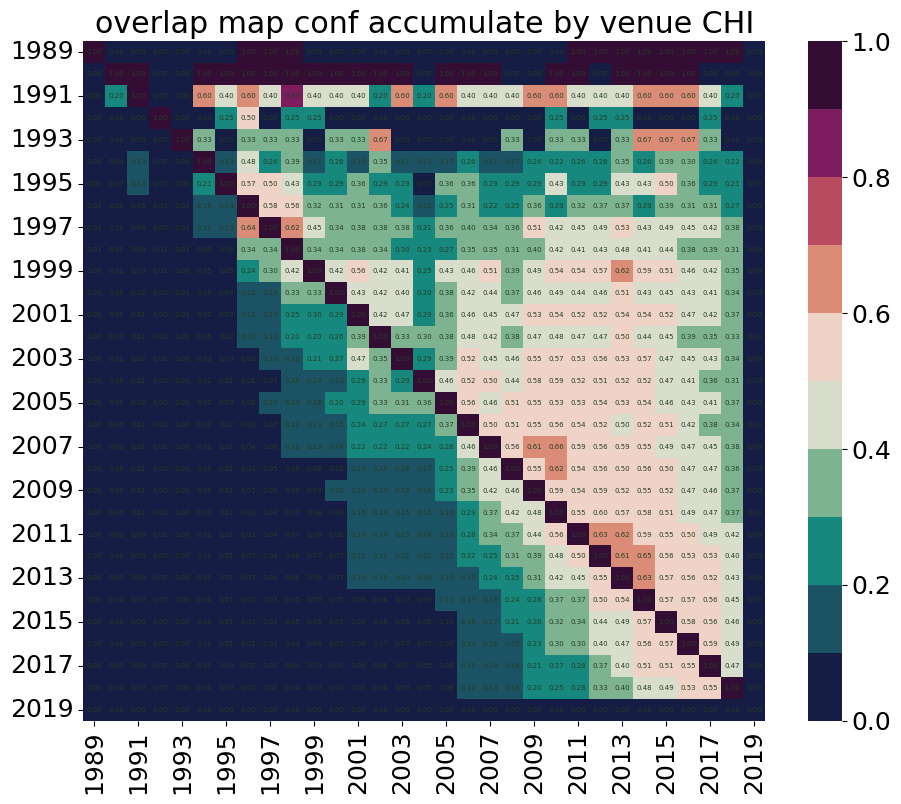

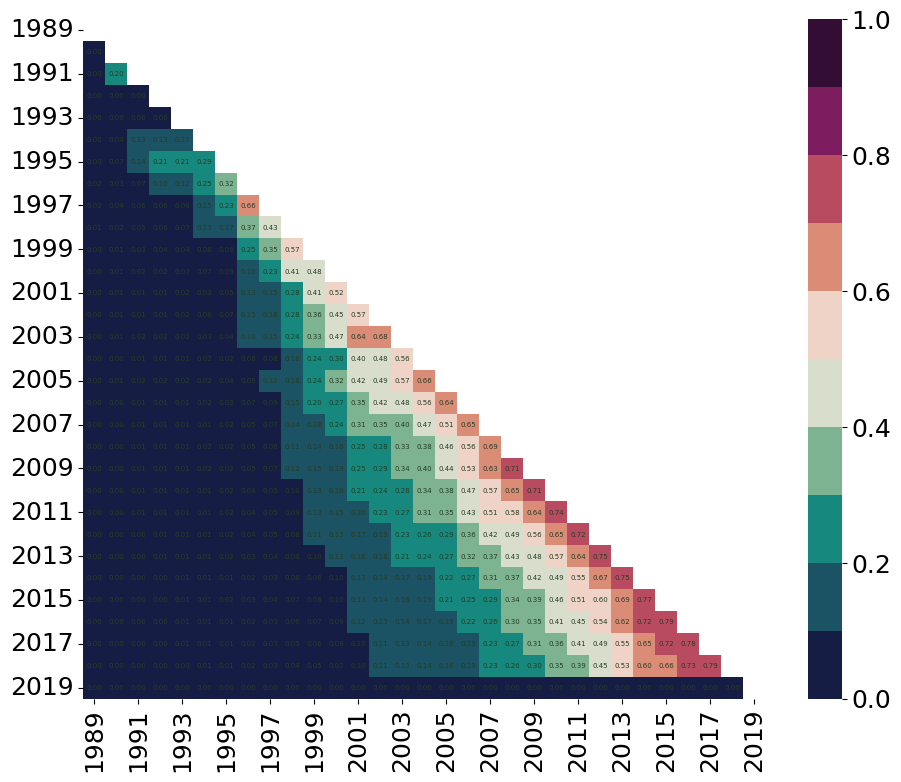

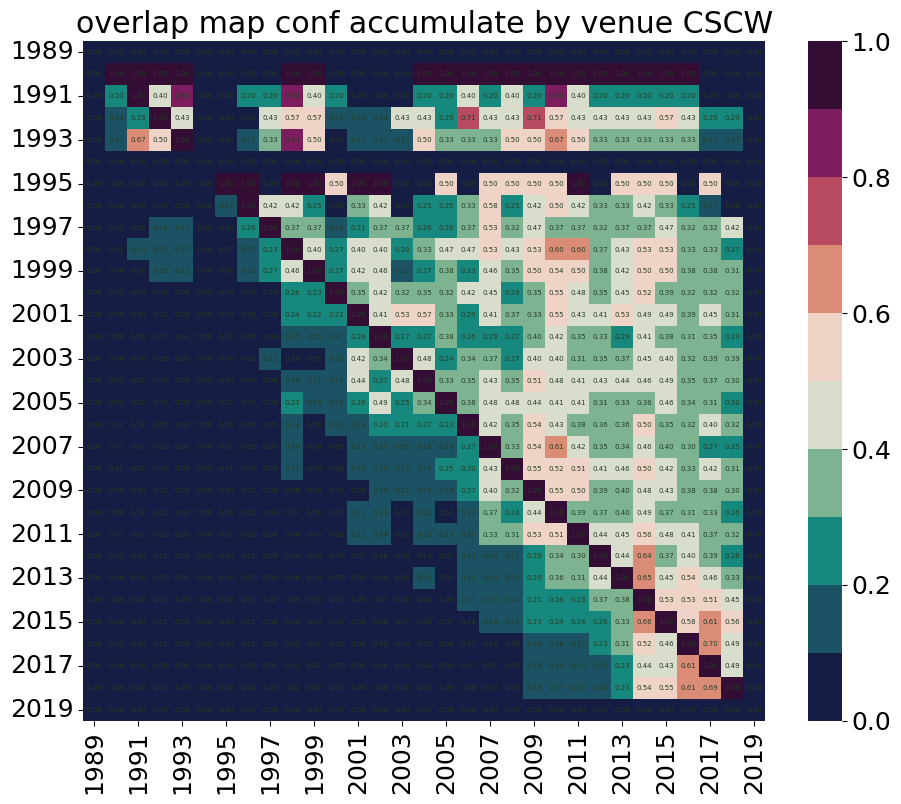

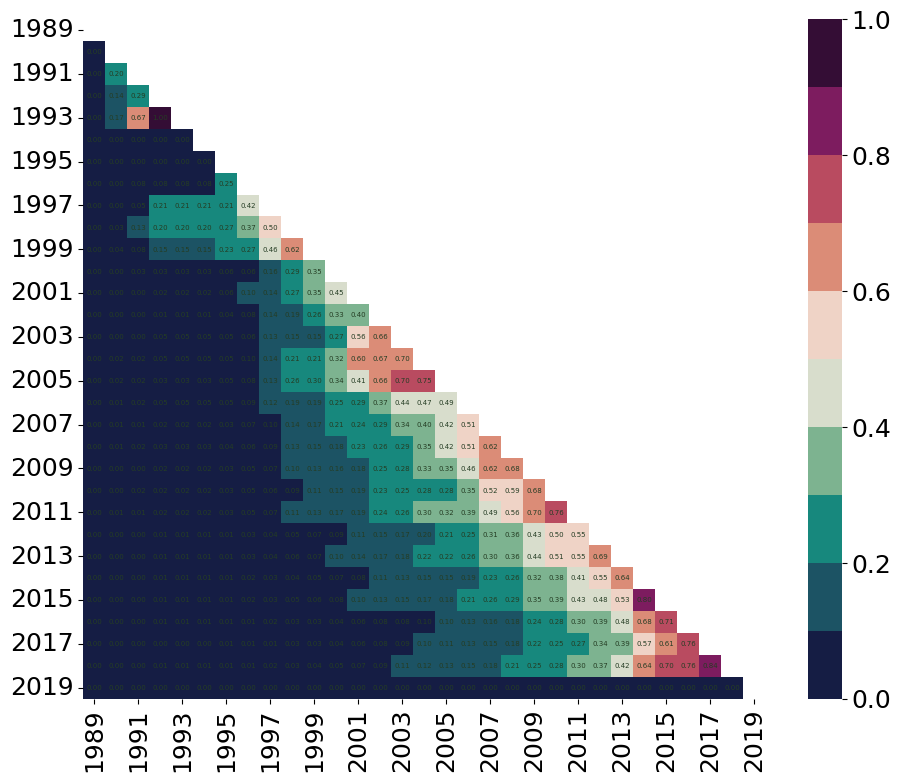

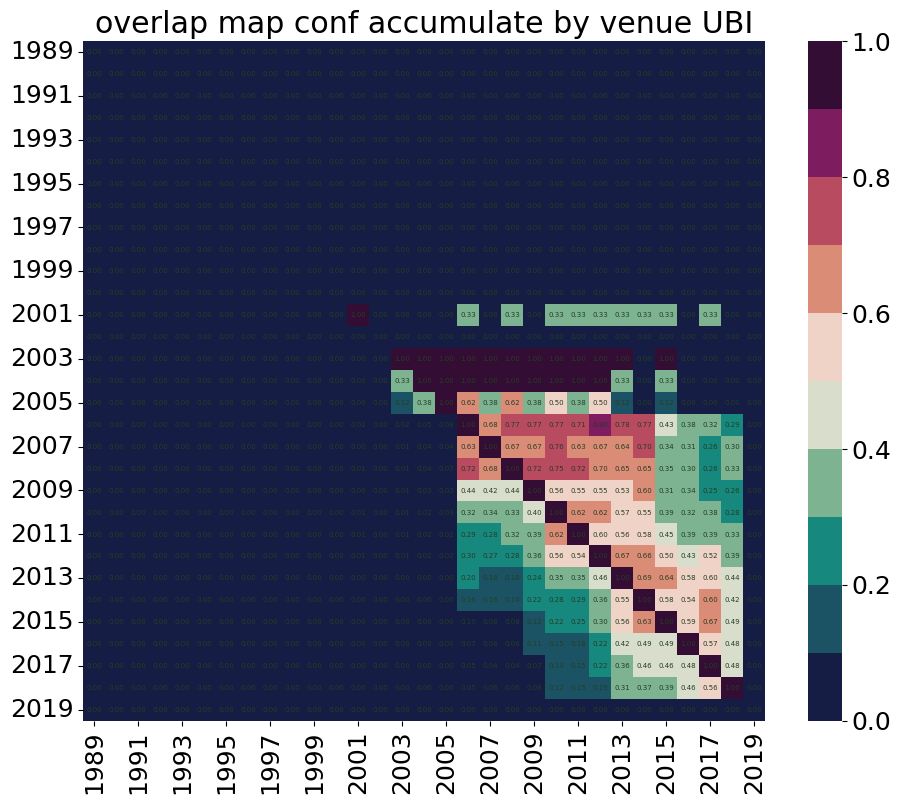

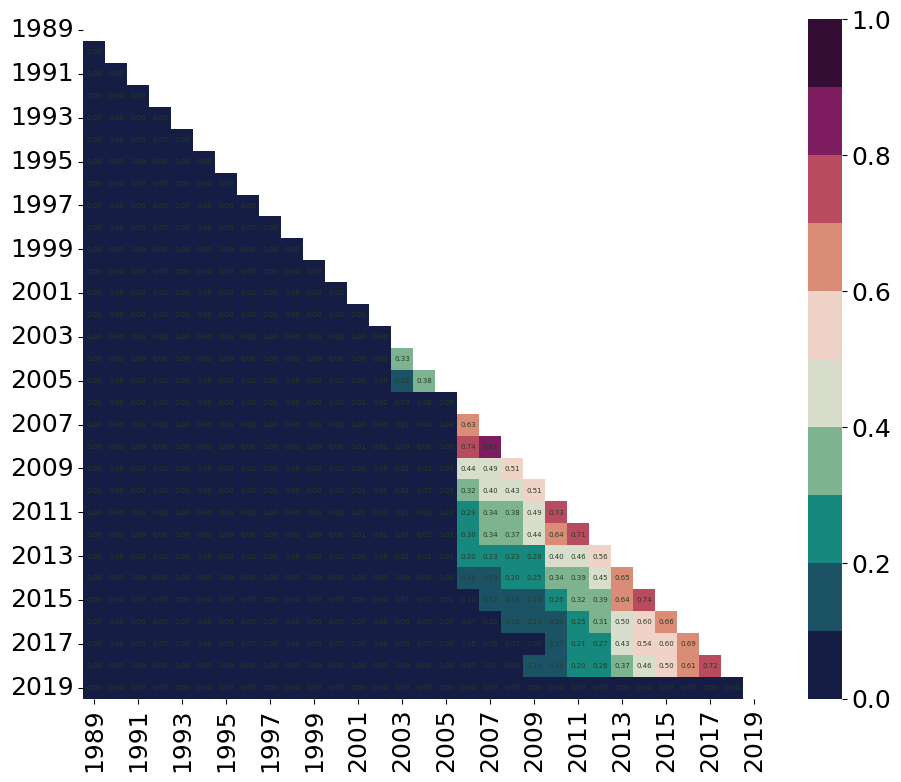

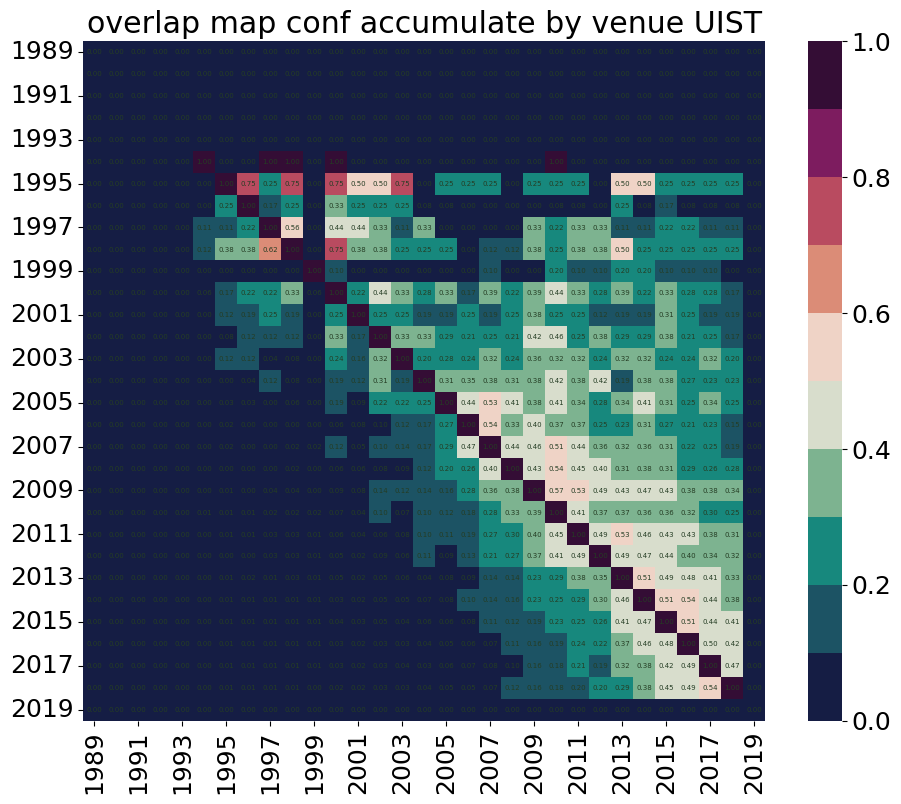

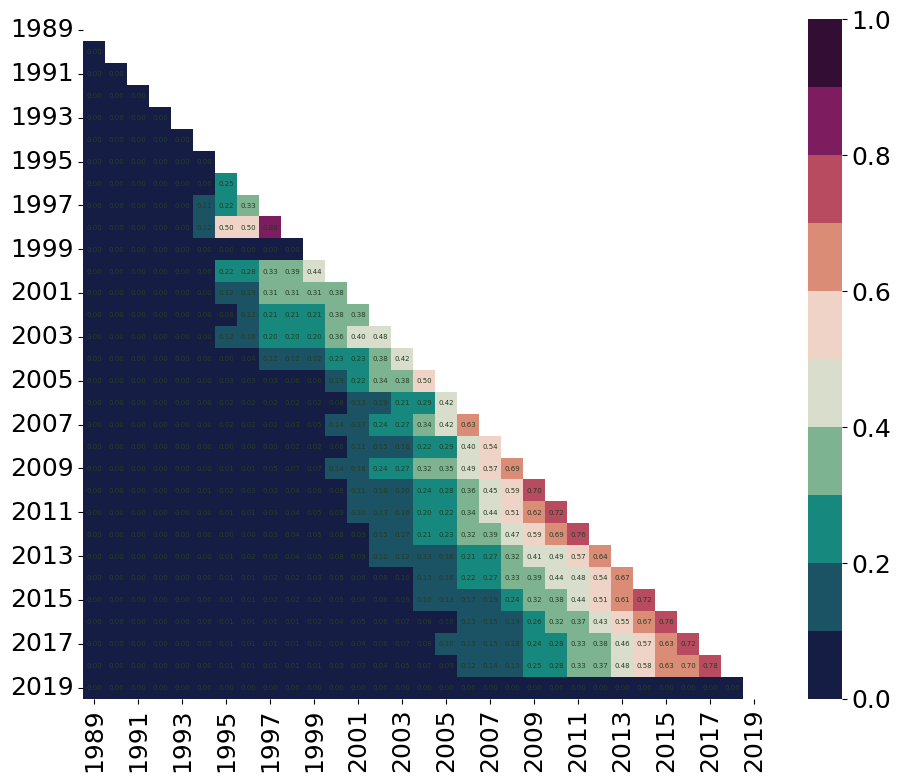

In [33]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import palettable

year_data = np.random.random((31,31))
accu_year_data = np.random.random((31,31))
for conf_id in ['CHI', 'CSCW', 'UBI', 'UIST']:
    df_conf = df_patent_paper_year[(df_patent_paper_year['conf_id'] == conf_id)]
    for year_x in range(1989,2020):
        for year_y in range(1989,2020):
            df_x = df_conf[(df_conf['patent_year'] == year_x)].drop_duplicates(['magid'])
            df_y = df_conf[(df_conf['patent_year'] == year_y)].drop_duplicates(['magid'])
            df_intersected = pd.merge(df_x, df_y, on=['magid'], how='inner')
            dup_cnt = df_intersected.shape[0]
            x_cnt = df_x.shape[0]
            y_cnt = df_y.shape[0]
            year_data[year_x-1989][year_y-1989] = dup_cnt / x_cnt if x_cnt > 0 else 0
            
            accu_df_x = df_conf[(df_conf['patent_year'] == year_x)].drop_duplicates(['magid'])
            accu_df_y = df_conf[(df_conf['patent_year'] <= year_y)].drop_duplicates(['magid'])
            accu_df_intersected = pd.merge(accu_df_x, accu_df_y, on=['magid'], how='inner')
            accu_dup_cnt = accu_df_intersected.shape[0]
            accu_x_cnt = accu_df_x.shape[0]
            accu_y_cnt = accu_df_y.shape[0]
            accu_year_data[year_x-1989][year_y-1989] = accu_dup_cnt / accu_x_cnt if accu_x_cnt > 0 else 0

    x_tick=[year for year in range(1989,2020)]
    y_tick=[year for year in range(1989,2020)]
    dcorr=pd.DataFrame(year_data,index=y_tick,columns=x_tick)

    plt.figure(figsize=(11, 9),dpi=100)
    plt.title("overlap map conf by venue {}".format(conf_id))
    sns.heatmap(data=dcorr,
                vmax=1, 
                cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
                annot=True,#图中数字文本显示
                fmt=".2f",#格式化输出图中数字，即保留小数位数等
                annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色            
               )
    plt.title("overlap map conf accumulate by venue {}".format(conf_id))

    accu_dcorr=pd.DataFrame(accu_year_data,index=y_tick,columns=x_tick)
    plt.figure(figsize=(11, 9),dpi=100)
    sns.heatmap(data=accu_dcorr,
                vmax=1, 
                cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
                annot=True,
                fmt=".2f",
                annot_kws={'size':5,'weight':'normal', 'color':'#253D24'},
                mask=np.triu(np.ones_like(dcorr,dtype=np.bool))#显示对脚线下面部分图，accumulative时，对角线上方皆为0
               )

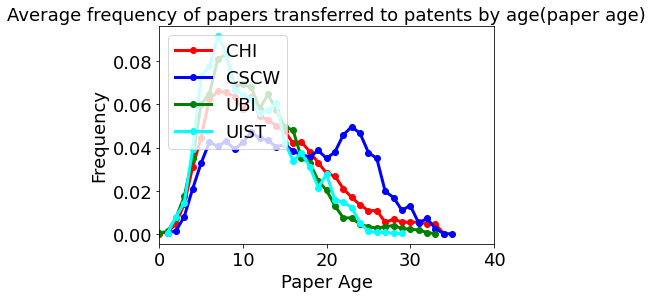

In [34]:
## Plot aggregate average number of times a paper gets transferred to patents per year
patent_CHI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CHI"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()
patent_CSCW_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CSCW"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()
patent_UBI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UBI"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()
patent_UIST_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UIST"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()

# f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0].groupby('patent_paper_lag')['count'].count()
# f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].count()
# f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].count()
# f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].count()

f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0]['count'].sum()
f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0]['count'].sum()
f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0]['count'].sum()
f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0]['count'].sum()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,40])
plt.xlabel('Paper Age', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average frequency of papers transferred to patents by age(paper age)', fontsize = 18)
plt.plot(f_CHI_year.index, f_CHI_year, 'o-', label = 'CHI', color = 'red', linewidth = 3)
plt.plot(f_CSCW_year.index, f_CSCW_year, 'o-', label = 'CSCW', color = 'blue', linewidth = 3)
plt.plot(f_UBI_year.index, f_UBI_year, 'o-', label = 'UBI', color = 'green', linewidth = 3)
plt.plot(f_UIST_year.index, f_UIST_year, 'o-', label = 'UIST', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()


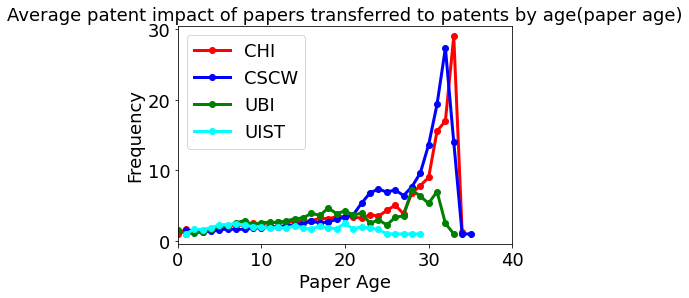

In [35]:
## Plot aggregate average number of times a paper gets transferred to patents per year
patent_CHI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CHI"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()
patent_CSCW_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="CSCW"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()
patent_UBI_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UBI"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()
patent_UIST_year = pd.DataFrame({'count': df_patent_paper_year.loc[df_patent_paper_year['conf_id']=="UIST"].groupby(['patent_paper_lag','magid'])['patent_id'].count()}).reset_index()

f_CHI_year = patent_CHI_year[patent_CHI_year['count']>0].groupby(['patent_paper_lag'])['count'].sum()/ patent_CHI_year[patent_CHI_year['count']>0].groupby(['patent_paper_lag'])['count'].count()
f_CSCW_year = patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_CSCW_year[patent_CSCW_year['count']>0].groupby('patent_paper_lag')['count'].count()
f_UBI_year = patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UBI_year[patent_UBI_year['count']>0].groupby('patent_paper_lag')['count'].count()
f_UIST_year = patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].sum()/ patent_UIST_year[patent_UIST_year['count']>0].groupby('patent_paper_lag')['count'].count()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([0,40])
plt.xlabel('Paper Age', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average patent impact of papers transferred to patents by age(paper age)', fontsize = 18)
plt.plot(f_CHI_year.index, f_CHI_year, 'o-', label = 'CHI', color = 'red', linewidth = 3)
plt.plot(f_CSCW_year.index, f_CSCW_year, 'o-', label = 'CSCW', color = 'blue', linewidth = 3)
plt.plot(f_UBI_year.index, f_UBI_year, 'o-', label = 'UBI', color = 'green', linewidth = 3)
plt.plot(f_UIST_year.index, f_UIST_year, 'o-', label = 'UIST', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()


In [37]:
#------------ analyze popular transferred paper -------------#

CHI_pd = pd.read_csv("../dataAug10/mergeversiondata/paperciting_CHI.tsv", sep=',')
CSCW_pd = pd.read_csv("../dataAug10/mergeversiondata/paperciting_CSCW.tsv", sep=',')
UIST_pd = pd.read_csv("../dataAug10/mergeversiondata/paperciting_UIST.tsv", sep=',')
UBI_pd = pd.read_csv("../dataAug10/mergeversiondata/paperciting_UbiComp.tsv", sep=',')

CHI_pcs_pd = pd.read_csv("../dataAug10/mergeversiondata/papercitationscience_CHI.tsv", sep=',')
CSCW_pcs_pd = pd.read_csv("../dataAug10/mergeversiondata/papercitationscience_CSCW.tsv", sep=',')
UIST_pcs_pd = pd.read_csv("../dataAug10/mergeversiondata/papercitationscience_UIST.tsv", sep=',')
UBI_pcs_pd = pd.read_csv("../dataAug10/mergeversiondata/papercitationscience_UbiComp.tsv", sep=',')
pcs_pd_list = [CHI_pcs_pd, CSCW_pcs_pd, UIST_pcs_pd, UBI_pcs_pd]
pd_list = [CHI_pd, CSCW_pd, UIST_pd, UBI_pd]

for idx in range(4):
    citation_pd = pd_list[idx]
    cited_paper_num = {}
    cited_patent_num = {}
    for row in citation_pd.iterrows():
        # citing_paperid_str = str(row["citingpaperid"])
        # cited_paperid_str = str(row["citedpaperid"])
        citing_paperid_str = str(row).split()[3] # paperid
        cited_paperid_str = str(row).split()[4]
        if cited_paperid_str in cited_paper_num.keys():
            cited_paper_num[cited_paperid_str] += 1
        else:
            cited_paper_num[cited_paperid_str] = 1
    result = []
    paperid_list = []
    # print(cited_paper_num)
    pcs_pd = pcs_pd_list[idx]
    for row in pcs_pd.iterrows():
        paperid = str(row).split()[9]
        patentid = str(row).split()[11]
        paperid_list.append(paperid)
        if paperid in cited_patent_num.keys():
            cited_patent_num[paperid] += 1
        else:
            cited_patent_num[paperid] = 1
    for k, v in cited_paper_num.items():
        if k not in cited_patent_num.keys():
            cited_patent_num[k] = 0                
        result.append(list([k, str(cited_paper_num[k]), str(cited_patent_num[k])]))
    result_pd = pd.DataFrame(data=result, columns=['magid', 'citedbypapers', 'citedbypatents'])
    result_pd.to_csv('popular_transferred_paper{}.tsv'.format(idx))

TypeError: tuple indices must be integers or slices, not str